# **Tweet Sentiment's Impact on Stock Returns**
**Group Name**: Insight Innovators

**Group Members**: Yuxuan Li (yl8095), Siyuan Lu (sl10865), Mason Lonoff (ml9542)

**Course**: Programming for Data Science (DS-1007)

**Instructor**: Jeremy Curuksu

**Submission Date**: 12/04/2024



---



## **Project Overview**
### **Objective**
The primary objective of this project is to analyze the relationship between social media sentiment and stock market performance. By leveraging sentiment analysis techniques and social media data characteristics, the project aims to quantify sentiment impact and identify key patterns.


*   **Goal 1**: Analyze sentiment impact on stocks with different volitility.
*   **Goal 2**: Explore the difference in how tweets affect stock behavior across different industries.
*   **Goal 3**: Determine the most sensitive stocks to tweet sentiment.





### **Data Sources**


*   **Main Dataset**: Tweet Sentiment's Impact on Stock Returns (Kaggle dataset): https://www.kaggle.com/datasets/thedevastator/tweet-sentiment-s-impact-on-stock-returns/data.



---



## **Importing Libraries**
To begin, we import all the necessary libraries for data analysis, visualization, and geospatial processing.

This includes commonly used Python libraries like:

numpy, pandas, and matplotlib for numerical and data manipulation, and basic plotting.
seaborn for advanced visualizations, including custom hue plots.
yfinance for easy access to historical market data, real-time stock prices, and financial information.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

## **Load Data and Preprocess**

In [3]:
def load_data(filepath):
    """
    Load the dataset from a specified CSV file.

    Parameters:
        filepath (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded dataset.
    """
    return pd.read_csv(filepath)

def filter_stock_tweets(df):
    """
    Filter out rows where 'STOCK' is 'Next' but 'TWEET' does not contain '@nextofficial'.

    Parameters:
        df (pd.DataFrame): Original dataset.

    Returns:
        pd.DataFrame: Filtered dataset.
    """
    return df[~((df['STOCK'] == 'Next') & ~df['TWEET'].str.contains('@nextofficial', na=False))]

def handle_missing_values(df):
    """
    Cleans the dataset by:
    1. Dropping rows where 'Unnamed: 0' has missing values.
    2. Resetting the index of the DataFrame.
    3. Dropping the 'index' and 'Unnamed: 0' columns.
    4. Dropping any remaining rows with missing values in the entire dataset.

    Parameters:
        df (pd.DataFrame): The dataset to clean.

    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    df = df.dropna(subset=["Unnamed: 0"]).reset_index()
    df = df.drop(columns=["index", "Unnamed: 0"])
    df = df.dropna()

    return df

# Main execution
if __name__ == "__main__":
    filepath = 'full_dataset-release.csv'
    df = load_data(filepath)
    df = filter_stock_tweets(df)
    df = handle_missing_values(df)
    print(df.head())

C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\1303483465.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)


                                                TWEET      STOCK        DATE  \
1   @FAME95FM1 Jamaicans make money with @Payoneer...     PayPal  31/01/2017   
2   @CBSi Jamaicans make money with @Payoneer @Pay...     PayPal  31/01/2017   
3   @Hitz92fm Jamaicans make money with @Payoneer ...     PayPal  31/01/2017   
7   RT @nikitakhara: Thank you, @Starbucks CEO for...  Starbucks  31/01/2017   
12  @gawker Jamaicans make money with @Payoneer @P...     PayPal  31/01/2017   

    LAST_PRICE  1_DAY_RETURN  2_DAY_RETURN  3_DAY_RETURN  7_DAY_RETURN  \
1        39.78      0.002011      0.012318      0.012318      0.054801   
2        39.78      0.002011      0.012318      0.012318      0.054801   
3        39.78      0.002011      0.012318      0.012318      0.054801   
7        55.22      0.012314      0.016298      0.016298      0.058312   
12       39.78      0.002011      0.012318      0.012318      0.054801   

     PX_VOLUME  VOLATILITY_10D  VOLATILITY_30D  LSTM_POLARITY  \
1    9100

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335061 entries, 1 to 1069450
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TWEET              335061 non-null  object 
 1   STOCK              335061 non-null  object 
 2   DATE               335061 non-null  object 
 3   LAST_PRICE         335061 non-null  float64
 4   1_DAY_RETURN       335061 non-null  float64
 5   2_DAY_RETURN       335061 non-null  float64
 6   3_DAY_RETURN       335061 non-null  float64
 7   7_DAY_RETURN       335061 non-null  float64
 8   PX_VOLUME          335061 non-null  float64
 9   VOLATILITY_10D     335061 non-null  float64
 10  VOLATILITY_30D     335061 non-null  float64
 11  LSTM_POLARITY      335061 non-null  float64
 12  TEXTBLOB_POLARITY  335061 non-null  float64
dtypes: float64(10), object(3)
memory usage: 35.8+ MB


In [5]:
df.describe()

,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
count,335061.000000,335061.000000,335061.000000,335061.000000,335061.000000,3.350610e+05,335061.000000,335061.000000,335061.000000,335061.000000
mean,1325.396266,0.000820,0.001522,0.001463,0.003077,1.930384e+07,24.555261,24.882039,0.112645,0.078757
std,7375.012993,0.018417,0.022829,0.027279,0.043194,2.061585e+07,17.886099,12.602573,0.993637,0.266073
min,3.010000,-0.146650,-0.173554,-0.177851,-0.204959,1.000000e+00,0.619000,4.525000,-1.000000,-1.000000
25%,53.900000,-0.005570,-0.009179,-0.011640,-0.022790,4.337481e+06,15.005000,18.182000,-1.000000,0.000000
50%,152.760000,0.000000,0.000000,-0.000621,-0.001870,1.175382e+07,20.517000,22.174000,1.000000,0.000000
75%,357.320000,0.004334,0.010055,0.014014,0.025137,2.954443e+07,26.915000,25.475000,1.000000,0.156250
max,165500.000000,0.233973,0.243639,0.243639,0.267113,3.148332e+08,124.137000,87.685000,1.000000,1.000000


Slight positive bias in the overall sentiment predicted by both models; high variability in the sentiment scores predicted by the LSTM model and much less variability for TEXTBLOB model; At least 25% of the tweets labeled as negative by LSTM model; median sentiment is neutral for both models; **LSTM model distinguishes sentiment more aggressively compared to TEXTBLOB, which has lower variability and narrower ranges in its scores**



---



## **Exploratory Data Analysis**

In [6]:
def plot_sentiment_distributions(df):
    """
    Plot the distribution of sentiment scores for LSTM and TextBlob polarities.

    Parameters:
        df (pd.DataFrame): The dataset containing sentiment scores.
    """
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df['LSTM_POLARITY'], label='LSTM Polarity', shade=True)
    sns.kdeplot(df['TEXTBLOB_POLARITY'], label='TextBlob Polarity', shade=True)
    plt.title('Distribution of Sentiment Scores')
    plt.legend()
    plt.show()

C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\3304716640.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['LSTM_POLARITY'], label='LSTM Polarity', shade=True)
C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\3304716640.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TEXTBLOB_POLARITY'], label='TextBlob Polarity', shade=True)


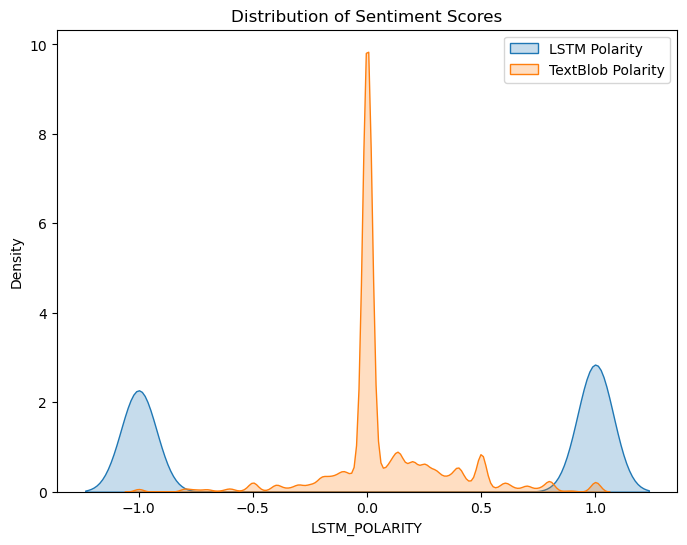

In [7]:
plot_sentiment_distributions(df)

*   LSTM Polarity: The distribution has two distinct peaks at -1 and 1, indicating a bimodal distribution. This suggests that the LSTM model often classifies sentiments as strongly positive or strongly negative, with little to no neutral predictions. The lack of neutral sentiment could lead to overconfidence in predicting extreme emotions, potentially causing false positives in cases of mixed sentiments.
*   TextBlob Polarity: The distribution is sharply peaked at 0, with a much smaller density in the positive and negative sentiment ranges. This suggests that TextBlob tends to assign neutral sentiment more often and is less confident in identifying strongly positive or negative sentiments. The strong central peak at 0 suggests it may underestimate the intensity of sentiments, which could lead to weaker predictive power in applications requiring precise sentiment differentiation.



In [8]:
def plot_stock_returns(df, timeframes):
    """
    Plot box plots of stock returns across different timeframes.

    Parameters:
        df (pd.DataFrame): The dataset containing stock return data.
        timeframes (list): List of columns representing timeframes.
    """
    df[timeframes].plot(kind='box', figsize=(8, 6))
    plt.title('Stock Returns Across Different Timeframes')
    plt.ylabel('Return')
    plt.show()

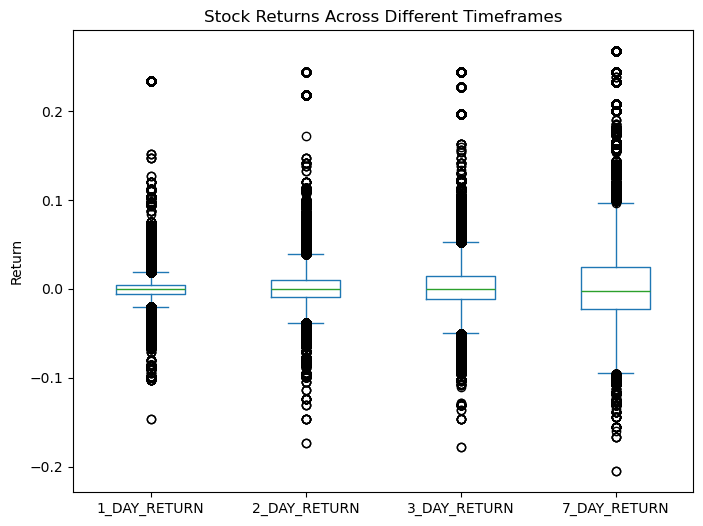

In [9]:
timeframes = ['1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN']
plot_stock_returns(df, timeframes)

The 7-day returns' interquartile range shows a wider spread compared to shorter timeframes. The variability in returns increases over longer timeframes, which aligns with the expectation that longer holding periods lead to more volatile outcomes (the relationship between sentiment scores and longer holding period returns is expected to be less predictable).

The distributions are relatively symmetrical around the median, with no obvious skewness. Positive and negative returns are generally balanced.

In [10]:
def compute_correlation_matrix(df, columns):
    """
    Compute and display the correlation matrix for specified columns.

    Parameters:
        df (pd.DataFrame): The dataset containing the relevant data.
        columns (list): List of columns to include in the correlation matrix.
    """
    correlation_matrix = df[columns].corr()
    print('Correlation Matrix:')
    print(correlation_matrix)
    return correlation_matrix

In [11]:
columns_to_correlate = ['LSTM_POLARITY', 'TEXTBLOB_POLARITY', '1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN']
correlation_matrix = compute_correlation_matrix(df, columns_to_correlate)

Correlation Matrix:
                   LSTM_POLARITY  TEXTBLOB_POLARITY  1_DAY_RETURN  \
LSTM_POLARITY           1.000000           0.098295      0.004060   
TEXTBLOB_POLARITY       0.098295           1.000000     -0.023269   
1_DAY_RETURN            0.004060          -0.023269      1.000000   
2_DAY_RETURN           -0.000302          -0.025690      0.785274   
3_DAY_RETURN           -0.008917          -0.038014      0.646872   
7_DAY_RETURN           -0.018221          -0.020226      0.418018   

                   2_DAY_RETURN  3_DAY_RETURN  7_DAY_RETURN  
LSTM_POLARITY         -0.000302     -0.008917     -0.018221  
TEXTBLOB_POLARITY     -0.025690     -0.038014     -0.020226  
1_DAY_RETURN           0.785274      0.646872      0.418018  
2_DAY_RETURN           1.000000      0.830636      0.571003  
3_DAY_RETURN           0.830636      1.000000      0.679813  
7_DAY_RETURN           0.571003      0.679813      1.000000  




*   LSTM and TextBlob results on sentiment scores are not strongly aligned.
*   LSTM sentiment scores do not have a strong linear relationship with stock returns. The very weak negative correlations suggests that positive sentiment tweets have a slight tendency to correspond to negative stock returns, but the relationship is negligible.
*   TextBlob sentiment scores also show no meaningful relationship with stock returns, suggesting that tweet sentiment alone might not be a strong predictor of stock performance.

next step for consideration: examine the combined effects of sentiment scores and other features (e.g. PX_VOLUME, VOLATILITY_10D) on stock returns? Investigate non-linear relationship?

*   No clear trend or pattern between sentiment scores labeled and stock returns.
*   Slightly tighter distributions of 1_DAY_RETURN and 2_DAY_RETURN (?)







In [12]:
def compute_correlations_by_group(df, group_column, correlation_pairs):
    """
    Compute correlations by group for specified column pairs.

    Parameters:
        df (pd.DataFrame): The dataset to group and compute correlations.
        group_column (str): Column name to group the dataset by.
        correlation_pairs (list of tuple): List of tuples where each tuple contains two column names to correlate.

    Returns:
        dict: Nested dictionary of group names and their corresponding correlations.
    """
    grouped = df.groupby(group_column)
    correlation_results = {}

    for group_name, group in grouped:
        correlations = {f"{col1}_{col2}": group[col1].corr(group[col2]) for col1, col2 in correlation_pairs}
        correlation_results[group_name] = correlations

    return correlation_results

def display_sorted_correlations(correlation_results, sort_key):
    """
    Display sorted correlations by a specified key.

    Parameters:
        correlation_results (dict): Nested dictionary of correlations by group.
        sort_key (str): Key to sort the results by.
    """
    sorted_results = sorted(correlation_results.items(), key=lambda x: x[1].get(sort_key, 0), reverse=True)
    for group, correlations in sorted_results:
        print(f"Group: {group}")
        for corr_name, value in correlations.items():
            print(f"  {corr_name}: {value}")
        print()

In [13]:
correlation_pairs = [
    ('LSTM_POLARITY', '1_DAY_RETURN'),
    ('LSTM_POLARITY', '2_DAY_RETURN'),
    ('LSTM_POLARITY', '3_DAY_RETURN'),
    ('LSTM_POLARITY', '7_DAY_RETURN'),
    ('TEXTBLOB_POLARITY', '1_DAY_RETURN'),
    ('TEXTBLOB_POLARITY', '2_DAY_RETURN'),
    ('TEXTBLOB_POLARITY', '3_DAY_RETURN'),
    ('TEXTBLOB_POLARITY', '7_DAY_RETURN'),
]
correlations = compute_correlations_by_group(df, 'STOCK', correlation_pairs)
display_sorted_correlations(correlations, 'LSTM_POLARITY_1_DAY_RETURN')

c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Group: Cardinal Health
  LSTM_POLARITY_1_DAY_RETURN: nan
  LSTM_POLARITY_2_DAY_RETURN: nan
  LSTM_POLARITY_3_DAY_RETURN: nan
  LSTM_POLARITY_7_DAY_RETURN: nan
  TEXTBLOB_POLARITY_1_DAY_RETURN: 1.0
  TEXTBLOB_POLARITY_2_DAY_RETURN: 0.9999999999999998
  TEXTBLOB_POLARITY_3_DAY_RETURN: 1.0
  TEXTBLOB_POLARITY_7_DAY_RETURN: 1.0

Group: Volkswagen
  LSTM_POLARITY_1_DAY_RETURN: 0.4043780911293081
  LSTM_POLARITY_2_DAY_RETURN: 0.3336665631419779
  LSTM_POLARITY_3_DAY_RETURN: 0.1887756090648908
  LSTM_POLARITY_7_DAY_RETURN: 0.42865030177224
  TEXTBLOB_POLARITY_1_DAY_RETURN: 0.17796707383081053
  TEXTBLOB_POLARITY_2_DAY_RETURN: 0.4154864764299454
  TEXTBLOB_POLARITY_3_DAY_RETURN: 0.1780951027481254
  TEXTBLOB_POLARITY_7_DAY_RETURN: 0.48355557978870994

Group: Danone
  LSTM_POLARITY_1_DAY_RETURN: 0.3487559113060118
  LSTM_POLARITY_2_DAY_RETURN: 0.24073047203191406
  LSTM_POLARITY_3_DAY_RETURN: 0.12977403577912108
  LSTM_POLARITY_7_DAY_RETURN: 0.09610007655248387
  TEXTBLOB_POLARITY_1_DAY_RETURN:



*   LSTM vs TextBlob Performance: LSTM_POLARITY generally shows higher positive correlations with stock returns, suggesting it might better capture the market sentiment's immediate impact. TEXTBLOB_POLARITY often has weaker or negative correlations, indicating it might not align as well with market movements in certain cases.
*   Timeframe Trends: Correlations tend to be strongest for 1-day returns, suggesting that sentiment has the most immediate impact. Correlations decrease or fluctuate over 7 days, indicating that other factors might influence returns over time.
*   Group-Specific Insights: Significant variations in correlations across groups suggest that sentiment impacts stocks differently, likely due to industry characteristics or investor behavior.







---



## **Research Direction 1: Analyze Sentiment Impact on Stocks with Different Volitility**

We segmented the stocks into two groups based on their 30-day volatility levels: the top 10% (high volatility) and the bottom 10% (low volatility) using the 0.9 and 0.1 quantile thresholds, respectively. This segmentation allows us to focus on the extremes of volatility, where sentiment may have a more significant impact.

C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\2280821978.py:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_column] = pd.to_datetime(df[date_column])


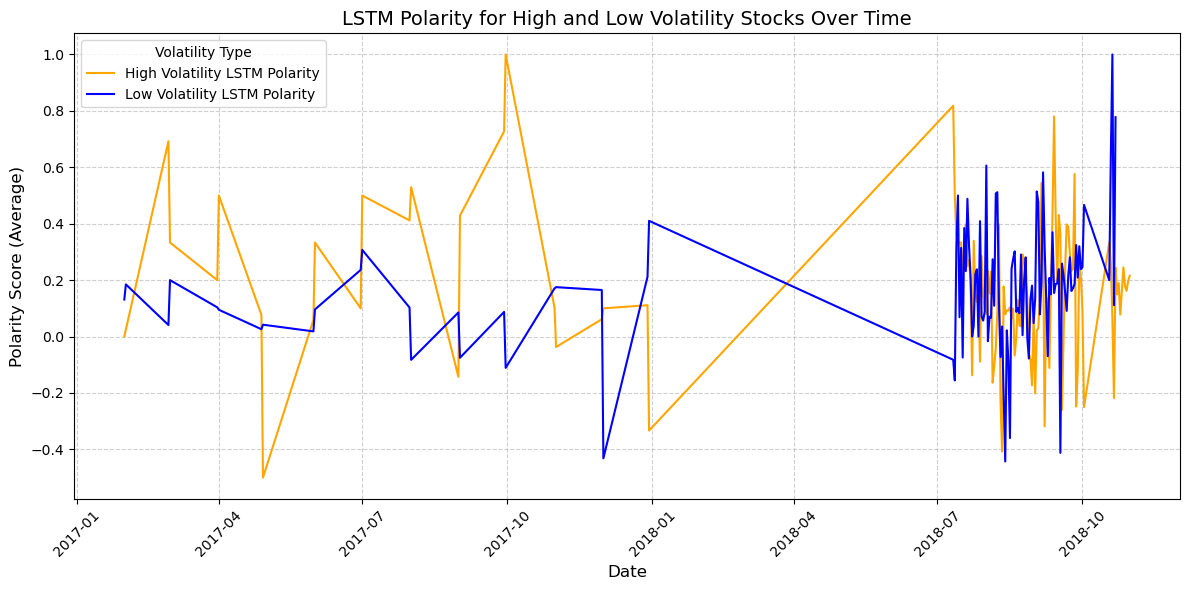

In [14]:
def plot_combined_sentiment(df, date_column='DATE', volatility_column='VOLATILITY_30D', sentiment_column='LSTM_POLARITY',
                            high_quantile=0.9, low_quantile=0.1):
    """
    Plot combined sentiment scores over time for high and low volatility stocks.

    Parameters:
    df (pd.DataFrame): The input dataframe containing stock data.
    date_column (str): The column name for dates. Default is 'DATE'.
    volatility_column (str): The column name for volatility data. Default is 'VOLATILITY_30D'.
    sentiment_column (str): The column name for sentiment scores. Default is 'LSTM_POLARITY'.
    high_quantile (float): The quantile threshold for high volatility. Default is 0.9.
    low_quantile (float): The quantile threshold for low volatility. Default is 0.1.

    Returns:
    None
    """
    df[date_column] = pd.to_datetime(df[date_column])

    high_threshold = df[volatility_column].quantile(high_quantile)
    low_threshold = df[volatility_column].quantile(low_quantile)
    high_volatility_df = df[df[volatility_column] > high_threshold]
    low_volatility_df = df[df[volatility_column] < low_threshold]

    high_volatility_numeric = high_volatility_df.select_dtypes(include=['number'])
    low_volatility_numeric = low_volatility_df.select_dtypes(include=['number'])
    high_volatility_numeric[date_column] = high_volatility_df[date_column]
    low_volatility_numeric[date_column] = low_volatility_df[date_column]

    high_volatility_avg = high_volatility_numeric.groupby(date_column).mean().reset_index()
    low_volatility_avg = low_volatility_numeric.groupby(date_column).mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=high_volatility_avg, x=date_column, y=sentiment_column,
                 label='High Volatility LSTM Polarity', color='orange')

    sns.lineplot(data=low_volatility_avg, x=date_column, y=sentiment_column,
                 label='Low Volatility LSTM Polarity', color='blue')

    plt.title('LSTM Polarity for High and Low Volatility Stocks Over Time', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Polarity Score (Average)', fontsize=12)
    plt.legend(title='Volatility Type', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_combined_sentiment(df)

*   The LSTM polarity scores for both high- and low-volatility stocks fluctuate significantly over time, we cannot observe any clear patterns suggesting that high or low volatility is related to LSTM sentiment polarity through this analysis.

To better analyze the relationship between sentiment and stock volatility, I segmented the data by individual stocks and calculated the correlation between LSTM sentiment polarity and 1-day stock returns. These correlations were then compared across 10-day and 30-day volatility metrics.

In [15]:
def calculate_volatility_and_correlation(df, group_by_col, return_col, volatility_cols):
    """
    Calculate average volatility and correlation between sentiment and returns for each stock.

    Parameters:
        df (pd.DataFrame): The dataset containing stock and sentiment data.
        group_by_col (str): The column to group by (e.g., 'STOCK').
        return_col (str): The column representing returns (e.g., '1_DAY_RETURN').
        volatility_cols (list): List of volatility column names to compute the average.

    Returns:
        pd.DataFrame: DataFrame containing average volatility and correlation for each group.
    """
    correlation_func = lambda x: x.corr(df.loc[x.index, return_col])
    agg_dict = {col: 'mean' for col in volatility_cols}
    agg_dict['LSTM_POLARITY'] = correlation_func

    volatility_data = df.groupby(group_by_col).agg(agg_dict).reset_index()
    volatility_data.rename(columns={'LSTM_POLARITY': 'LSTM_CORRELATION'}, inplace=True)
    return volatility_data

In [16]:
def plot_volatility_vs_correlation(df, x_cols, y_col, labels, title, xlabel, ylabel):
    """
    Plot volatility vs correlation scatter plots for given columns.

    Parameters:
        df (pd.DataFrame): The dataset containing volatility and correlation data.
        x_cols (list): List of columns to plot on the x-axis.
        y_col (str): The column to plot on the y-axis.
        labels (list): List of labels corresponding to the x_cols.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    for x_col, label in zip(x_cols, labels):
        plt.scatter(df[x_col], df[y_col], alpha=0.7, label=label, marker='o' if label == labels[0] else 'x')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [17]:
def get_top_stocks(df, sort_cols, n=5):
    """
    Identify the top stocks by volatility and their correlations.

    Parameters:
        df (pd.DataFrame): The dataset containing volatility and correlation data.
        sort_by_cols (list): List of columns to sort by.
        n (int): Number of top stocks to return.

    Returns:
        pd.DataFrame: Top n stocks sorted by the specified columns.
    """
    return df.sort_values(by=sort_cols, ascending=False).head(n)

c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


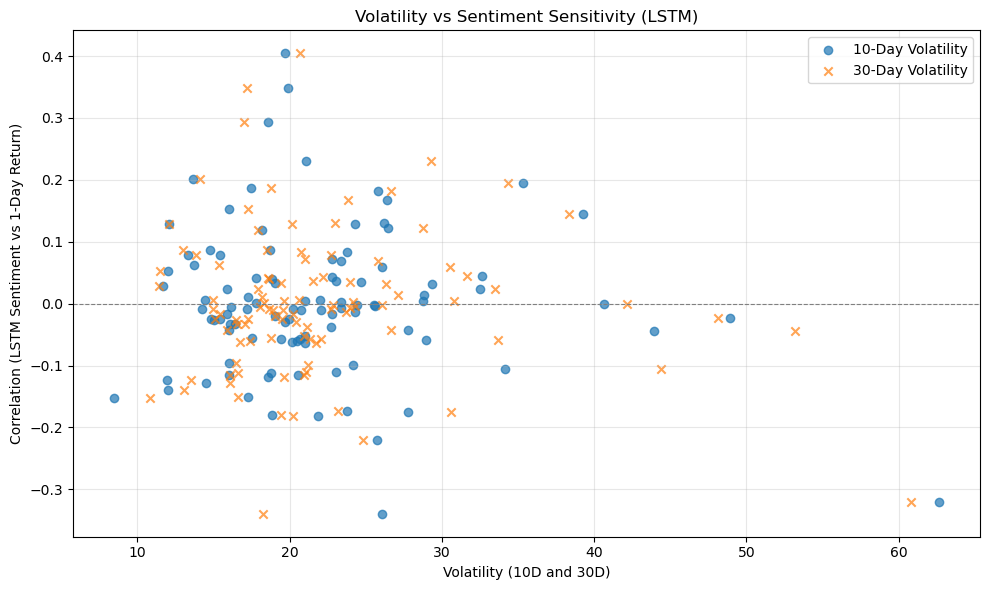

       STOCK  VOLATILITY_10D  VOLATILITY_30D  LSTM_CORRELATION
45       H&M       62.635739       60.825516         -0.320622
44   Groupon       48.903412       48.134014         -0.022620
95     Yahoo       43.936898       53.216219         -0.043839
36  Facebook       40.643031       42.153120         -0.000698
64   Netflix       39.238724       38.375806          0.144081


In [18]:
if __name__ == "__main__":
    volatility_cols = ['VOLATILITY_10D', 'VOLATILITY_30D']
    return_col = '1_DAY_RETURN'

    #Calculate volatility and correlation
    volatility_data = calculate_volatility_and_correlation(df, 'STOCK', return_col, volatility_cols)

    #Plot volatility vs correlation
    plot_volatility_vs_correlation(
        volatility_data,
        x_cols=['VOLATILITY_10D', 'VOLATILITY_30D'],
        y_col='LSTM_CORRELATION',
        labels=['10-Day Volatility', '30-Day Volatility'],
        title='Volatility vs Sentiment Sensitivity (LSTM)',
        xlabel='Volatility (10D and 30D)',
        ylabel='Correlation (LSTM Sentiment vs 1-Day Return)'
    )

    #Identify top stocks by volatility
    top_volatility_stocks = get_top_stocks(volatility_data, ['VOLATILITY_10D', 'VOLATILITY_30D'])
    print(top_volatility_stocks)

*   General Trend: The scatter plot shows no strong linear relationship between volatility (both 10-day and 30-day measures) and sentiment sensitivity (correlation between LSTM polarity and 1-day returns). This suggests that while volatility might influence sentiment sensitivity, it's not the dominant factor.

*   Clusters: Stocks with low volatility clusters around low sentiment sensitivity, indicating that less volatile stocks tend to react weakly to sentiment.


*   High Volatility ≠ High Sensitivity: High volatility doesn't consistently translate to strong sensitivity to tweet sentiments. For example, Yahoo is highly volatile but demonstrates weak sentiment correlation.

*   For Further Sentiment Analysis Models: Incorporating volatility as a feature might help refine predictions but should not be overemphasized, as it doesn't consistently predict sentiment sensitivity.



---



## **Research Direction 2: Explore the Difference in How Tweets Affect Stock Behavior across Different Industries**

In [19]:
# Now I want to add a column of each stock's ticker symbol. The below function achieves this.
def map_stock_to_ticker(df, stock_column, ticker_mapping):
    """
    Maps stock names to tickers in a DataFrame and identifies any missing mappings.

    Parameters:
        df (pd.DataFrame): The DataFrame containing stock data.
        stock_column (str): The column name in the DataFrame containing stock names ("STOCK" in this case).
        ticker_mapping (dict): A dictionary mapping stock names to their tickers.

    Returns:
        pd.DataFrame: Updated DataFrame with a new 'Ticker' column.
        pd.DataFrame: DataFrame containing rows with missing ticker mappings.
    """
    # Map stock names to tickers
    df['Ticker'] = df[stock_column].map(ticker_mapping)

    # Identify rows with missing tickers
    missing_tickers = df[df['Ticker'].isnull()]

    # Display missing tickers
    if not missing_tickers.empty:
        print("Missing tickers:")
        print(missing_tickers[stock_column].unique())
    else:
        print("No missing tickers.")

    return df, missing_tickers

In [20]:
# Implementation of the above function
ticker_mapping = {
    "Ford": "F", "Facebook": "META", "Google": "GOOGL", "Next": "NXT.L", "Apple": "AAPL", "Nike": "NKE", "Amazon": "AMZN", "Netflix": "NFLX", "Disney": "DIS", "Starbucks": "SBUX", "CBS": "PARA", "Intel": "INTC", "Walmart": "WMT", "Reuters": "TRI",
    "eBay": "EBAY", "Microsoft": "MSFT", "Samsung": "005930.KS",  "adidas": "ADDYY",  "PayPal": "PYPL", "Sony": "SONY", "McDonald's": "MCD", "BMW": "BMW.DE", "Toyota": "TM", "HP": "HPQ", "BP": "BP", "Honda": "HMC", "UPS": "UPS", "Visa": "V",
    "Ryanair": "RYAAY",  "IBM": "IBM", "Yahoo": "YHOO", "Boeing": "BA", "Shell": "SHEL", "Pepsi": "PEP", "Oracle": "ORCL", "Cisco": "CSCO", "Tesco": "TSCO.L", "Verizon": "VZ", "Nissan": "NSANY", "Audi": "VWAGY", "Kroger": "KR", "Costco": "COST",
    "SAP": "SAP", "Comcast": "CMCSA", "Adobe": "ADBE", "Burberry": "BRBY.L", "HSBC": "HSBC", "AT&T": "T", "TMobile": "TMUS", "Hyundai": "HYMTF", "FedEx": "FDX", "Mastercard": "MA", "Vodafone": "VOD", "Nestle": "NSRGY", "Exxon": "XOM", "Bayer": "BAYRY",
    "ASOS": "ASC.L",  "Pfizer": "PFE", "Gillette": "PG", "H&M": "HNNMY", "JPMorgan": "JPM", "Heineken": "HEINY", "Chevron": "CVX", "Citigroup": "C", "Siemens": "SIEGY", "Allianz": "ALIZY", "Colgate": "CL", "TripAdvisor": "TRIP", "CocaCola": "KO", "BlackRock": "BLK",
    "Groupon": "GRPN",  "Santander": "SAN", "Aviva": "AV.L", "easyJet": "EZJ.L", "Kellogg's": "K", "Expedia": "EXPE", "L'Oreal": "LRLCY", "salesforce.com": "CRM", "Wells Fargo": "WFC", "BASF": "BASFY", "Goldman Sachs": "GS", "GSK": "GSK", "Bank of America": "BAC",
    "Viacom": "VIA", "American Express": "AXP", "Thales": "HO.PA", "Morgan Stanley": "MS", "Carrefour": "CRRFY", "Home Depot": "HD", "AstraZeneca": "AZN", "bookingcom": "BKNG", "General Electric": "GE", "P&G": "PG", "Danone": "DANOY", "John Deere": "DE",
    "Deutsche Bank": "DB", "Volkswagen": "VWAGY", "Equinor": "EQNR", "CVS Health": "CVS", "21CF": "FOXA","Cardinal Health": "CAH"
}

df, missing_tickers = map_stock_to_ticker(df, 'STOCK', ticker_mapping)

df.head()

No missing tickers.


,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,Ticker
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0,PYPL
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,0.0,PYPL
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0,PYPL
7,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,2017-01-31,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1.0,0.2,SBUX
12,@gawker Jamaicans make money with @Payoneer @P...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0,PYPL


There are no missing rows. We can see that the Ticker column was successfully created and applied.

To conduct industry based analysis, I want to create another column that displays the stock's industry. I will be fetching the industry from Yahoo Finance and mapping it to the dataframe. I included error handling if any of the stock's industry couldn't be fetched. I manually map those industries.

In [21]:
def fetch_and_add_industries(df, manual_mapping=None):
    """
    Fetch industries for a list of stock ticker industries using Yahoo Finance and add them to the DataFrame.
    Uses manual mapping as a fallback or override for missing/incorrect industries.

    Parameters:
        df (pd.DataFrame): DataFrame containing at least a 'Ticker' column with stock tickers.
        manual_mapping (dict, optional): Manually defined mapping of stock tickers to industries.

    Returns:
        pd.DataFrame: Updated DataFrame with an 'Industry' column.
    """
    # Initialize industry mapping
    industry_mapping = {}

    # Get unique tickers from the DataFrame
    stock_list = df['Ticker'].unique()

    # Fetch industry information for each ticker
    for stock in stock_list:
        try:
            info = yf.Ticker(stock).info
            industry_mapping[stock] = info.get('industry', 'Unknown')
        except Exception as e:
            print(f"Error fetching data for {stock}: {e}")
            industry_mapping[stock] = 'Unknown'

    # Add manual mapping
    if manual_mapping:
        for ticker, industry in manual_mapping.items():
            industry_mapping[ticker] = industry

    # Map the final industry_mapping to the DataFrame
    df['Industry'] = df['Ticker'].map(industry_mapping)

    return df


# Manual mapping for tickers
manual_mapping = {
    "YHOO": "Internet and Computer Software",
    "VIA": "Entertainment"
}

# Apply the function
df = fetch_and_add_industries(df, manual_mapping)

# Display the updated DataFrame
df

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/YHOO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=YHOO&crumb=PI6%2FmORVXq1


,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,Ticker,Industry
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0000,PYPL,Credit Services
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,0.0000,PYPL,Credit Services
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0000,PYPL,Credit Services
7,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,2017-01-31,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1.0,0.2000,SBUX,Restaurants
12,@gawker Jamaicans make money with @Payoneer @P...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0000,PYPL,Credit Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069437,@KapilSharmaK9 \r\r\r\r\r\r\nWas watching your...,Sony,2018-09-30,6966.00,0.000000,0.000000,-0.043210,-0.074935,10999200.0,39.149,24.595,1.0,0.0000,SONY,Consumer Electronics
1069438,RT @rmbyrne: Do you have any colleagues who th...,Google,2018-09-30,1207.08,0.000000,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,-1.0,-0.0625,GOOGL,Internet Content & Information
1069439,RT @AnnCoulter: Item No. 3 for FBI to investig...,Ford,2018-09-30,9.25,0.000000,0.000000,-0.002162,0.064865,30987233.0,23.492,22.989,-1.0,0.0000,F,Auto Manufacturers
1069444,RT @radiodisney: Tune in to the Radio Disney I...,Disney,2018-09-30,116.94,0.000000,0.000000,-0.007696,-0.055926,7366846.0,15.232,13.230,1.0,0.0000,DIS,Entertainment


After running the code without any manual mapping, Viacom and Yahoo both were not assigned an industry. This is because they have since been acquired by other companies since this the end of this dataset. As a result, they are no longer on Yahoo Finance. Every stock now has an industry assigned to it.

In the next two blocks of code, we can see that there are no more unknown stock industries. Also, the manual mapping worked correctly too.

In [22]:
df[df["Industry"] == "Unknown"]

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,Ticker,Industry


In [23]:
df[df["STOCK"] == "Yahoo"].head(1)

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,Ticker,Industry
6175,"Never thought I'd utter the words fake news, b...",Yahoo,2017-04-28,4.54,0.0,0.0,0.046256,0.036123,14000.0,40.824,62.043,-1.0,-0.333333,YHOO,Internet and Computer Software


We can see the number of observations by industry type now.

In [24]:
industry_counts = df['Industry'].value_counts()
print(industry_counts)

Industry
Internet Content & Information         74682
Auto Manufacturers                     60762
Entertainment                          38185
Consumer Electronics                   36191
Footwear & Accessories                 31326
Internet Retail                        29175
Restaurants                             9225
Software - Infrastructure               6638
Credit Services                         5836
Semiconductors                          5816
Discount Stores                         5712
Specialty Business Services             4868
Oil & Gas Integrated                    3567
Telecom Services                        3133
Integrated Freight & Logistics          2022
Grocery Stores                          1836
Computer Hardware                       1779
Airlines                                1492
Beverages - Non-Alcoholic               1348
Banks - Diversified                     1341
Information Technology Services         1305
Aerospace & Defense                     1298
I

Some of the industries have a very small amount of industries. We need to filter these out in order to have a representative analysis. I set the threshold of 30 observations. The filtering code is below.

In [25]:
# Set threshold (30 rows)
row_threshold = 30

# Filter industries that meet the threshold
valid_industries = industry_counts[industry_counts >= row_threshold].index

# Filter the DataFrame to include only valid industries
df_filtered = df[df['Industry'].isin(valid_industries)]

print(f"Industries with at least {row_threshold} rows:")
print(valid_industries)

Industries with at least 30 rows:
Index(['Internet Content & Information', 'Auto Manufacturers', 'Entertainment',
       'Consumer Electronics', 'Footwear & Accessories', 'Internet Retail',
       'Restaurants', 'Software - Infrastructure', 'Credit Services',
       'Semiconductors', 'Discount Stores', 'Specialty Business Services',
       'Oil & Gas Integrated', 'Telecom Services',
       'Integrated Freight & Logistics', 'Grocery Stores', 'Computer Hardware',
       'Airlines', 'Beverages - Non-Alcoholic', 'Banks - Diversified',
       'Information Technology Services', 'Aerospace & Defense',
       'Internet and Computer Software', 'Communication Equipment',
       'Software - Application', 'Drug Manufacturers - General',
       'Household & Personal Products', 'Luxury Goods', 'Packaged Foods',
       'Travel Services', 'Insurance - Diversified', 'Apparel Manufacturing',
       'Beverages - Brewers', 'Specialty Industrial Machinery',
       'Asset Management', 'Capital Markets', 'Ch

Now that we have our industries set, it's time for some analysis. We will look at analyzing the correlation between sentiment score and returns over the differing timeframes (1,2,3,7 days). I will visualize these results.

In [26]:
def analyze_correlations_by_group(df, group_col, target_cols, reference_col):
    """
    Computes correlations between a reference column and multiple target columns grouped by a group column,
    and visualizes the results.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        group_col (str): The column to group by (e.g., "Industry").
        target_cols (list): List of target columns to compute correlation with the reference column.
        reference_col (str): The column to correlate against (LSTM_POLARITY).

    Returns:
        dict: A dictionary with target columns as keys and Series of correlations as values.
    """
    correlation_results = {}

    for target_col in target_cols:
        # Compute correlations for each target column
        correlations = df.groupby(group_col).apply(
            lambda group: group[[reference_col, target_col]].corr().iloc[0, 1]
        )
        correlation_results[target_col] = correlations

        # Plot the correlation results
        plt.figure(figsize=(12, 6))
        correlations.dropna().sort_values().plot(kind='bar', title=f"Correlation Between {reference_col} and {target_col} by {group_col}")
        plt.ylabel("Correlation")
        plt.xlabel(group_col)
        plt.tight_layout()
        plt.show()

    return correlation_results

C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\1467538666.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby(group_col).apply(


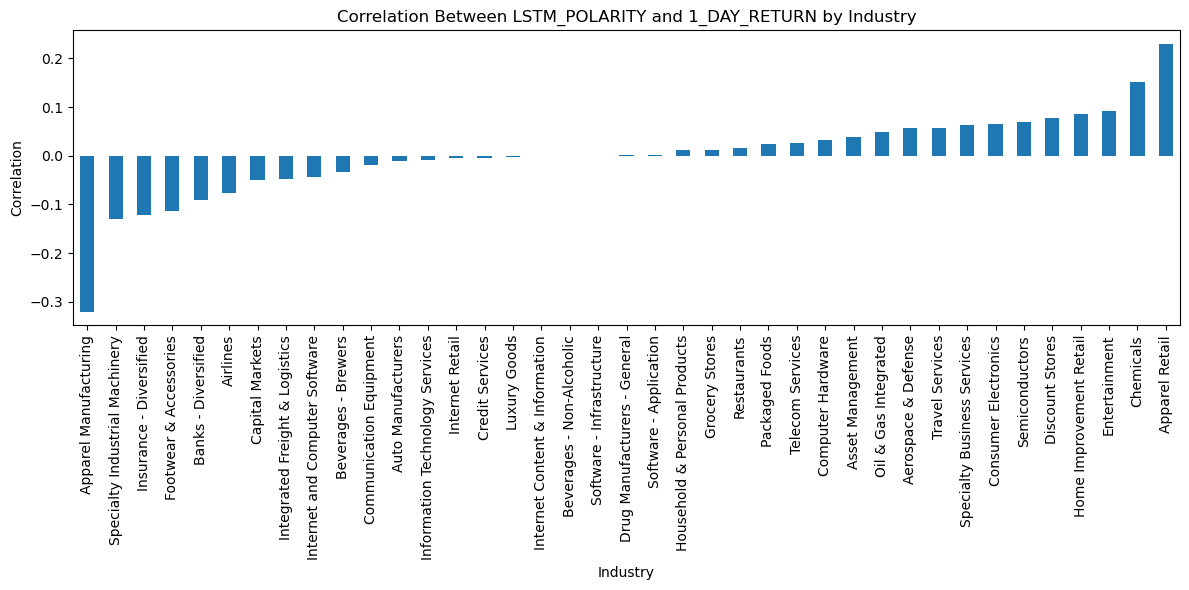

C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\1467538666.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby(group_col).apply(


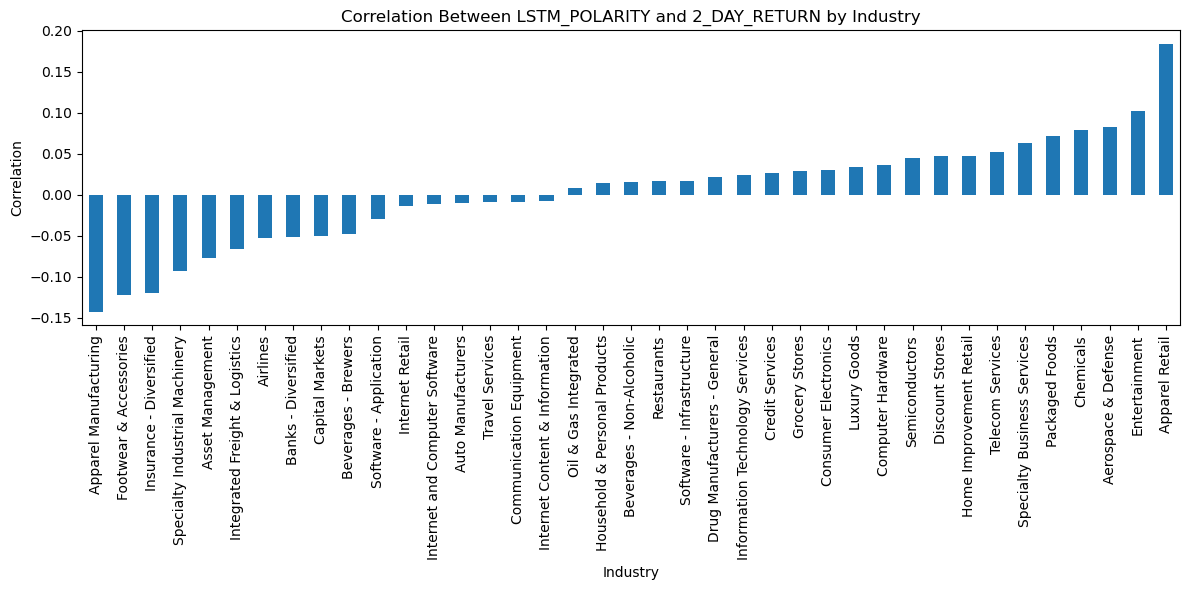

C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\1467538666.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby(group_col).apply(


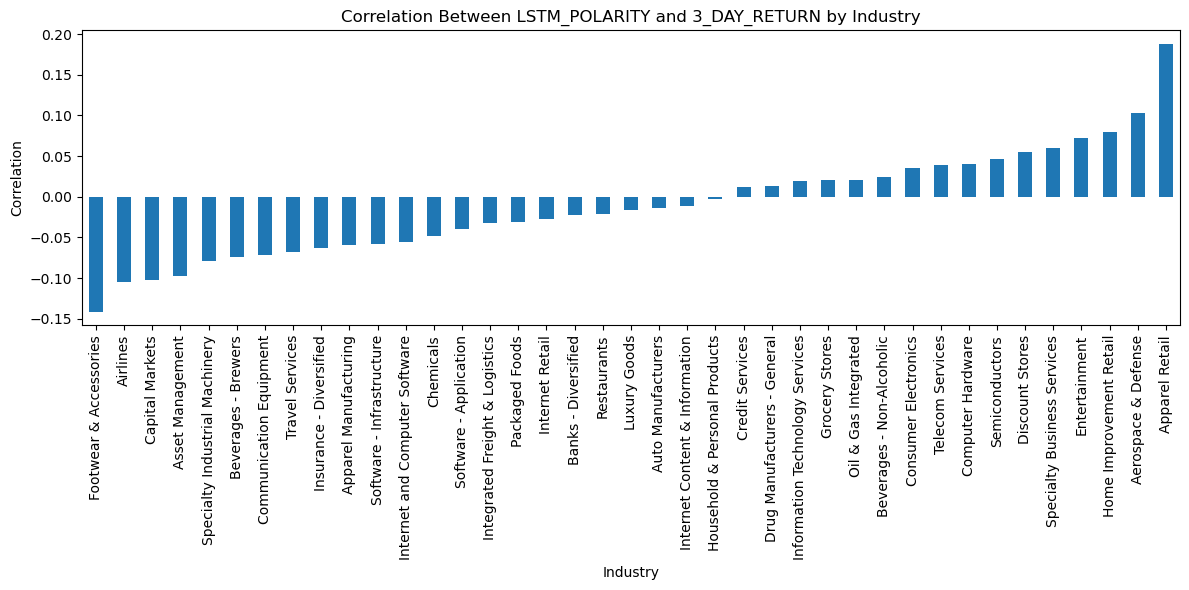

C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\1467538666.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby(group_col).apply(


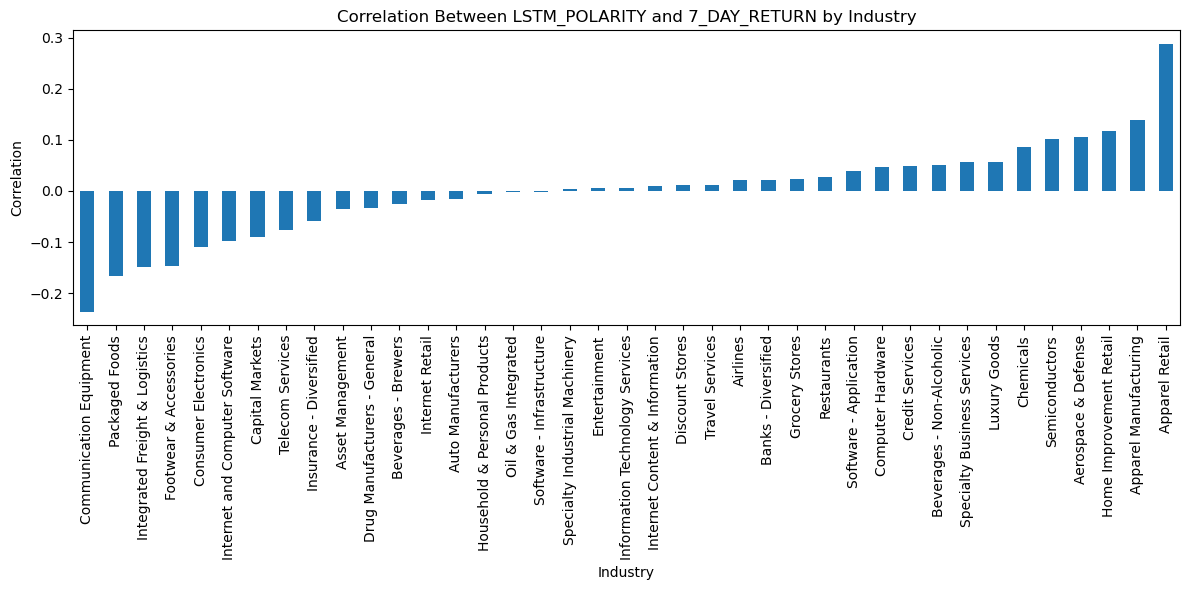

In [27]:
# List of return columns
return_columns = ['1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN']

# Analyze and visualize correlations
correlation_results = analyze_correlations_by_group(
    df=df_filtered,
    group_col='Industry',
    target_cols=return_columns,
    reference_col='LSTM_POLARITY'
)

*   None of the industries show a strong correlation between returns and sentiment scores.
*   Apparel Retail is always the strongest correlated industry.
*   There's not a major difference in the strength of correlation overall across return periods.





I want to compare how each industry does across time periods within a singular plot. The function below will analyze the correlation between returns and sentiment by industry across each return time frame.

In [ ]:
#Creating correlation_df as a global variable
correlation_df = pd.DataFrame(correlation_results)

def plot_correlation_subplots(correlation_df, n_groups=4, title="Correlation Between Sentiment and Returns by Industry"):
    """
    Creates grouped subplots for correlations grouped by industries.

    Parameters:
        correlation_df (pd.DataFrame): DataFrame containing correlations with industries as the index.
        n_groups (int): Number of groups to divide industries into for subplots.
        title (str): Title for the entire figure.

    Returns:
        None: Displays the subplots.
    """


    # Group industries into smaller chunks for subplots
    industry_groups = np.array_split(correlation_df.index, n_groups)

    # Create subplots
    n_rows = int(np.ceil(n_groups / 2))  # Dynamically calculate rows
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(16, 10))
    axes = axes.flatten()  # Flatten axes for easier indexing

    # Plot each group in a separate subplot
    for i, group in enumerate(industry_groups):
        correlation_df.loc[group].plot(kind='bar', ax=axes[i], legend=False)
        axes[i].set_title(f"Industry Group {i+1}")
        axes[i].set_ylabel("Correlation")
        axes[i].set_xlabel("Industry")
        axes[i].tick_params(axis='x', labelrotation=60)

    # Hide any unused subplots if `n_groups` doesn't perfectly match the grid
    for j in range(len(industry_groups), len(axes)):
        fig.delaxes(axes[j])

    # Add a shared legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), title="Timeframe", borderaxespad=0)

    # Adjust layout for better readability
    plt.tight_layout(rect=[0, 0, 0.85, 0.95]) 
    plt.suptitle(title, fontsize=16, y=0.98)
    plt.show()

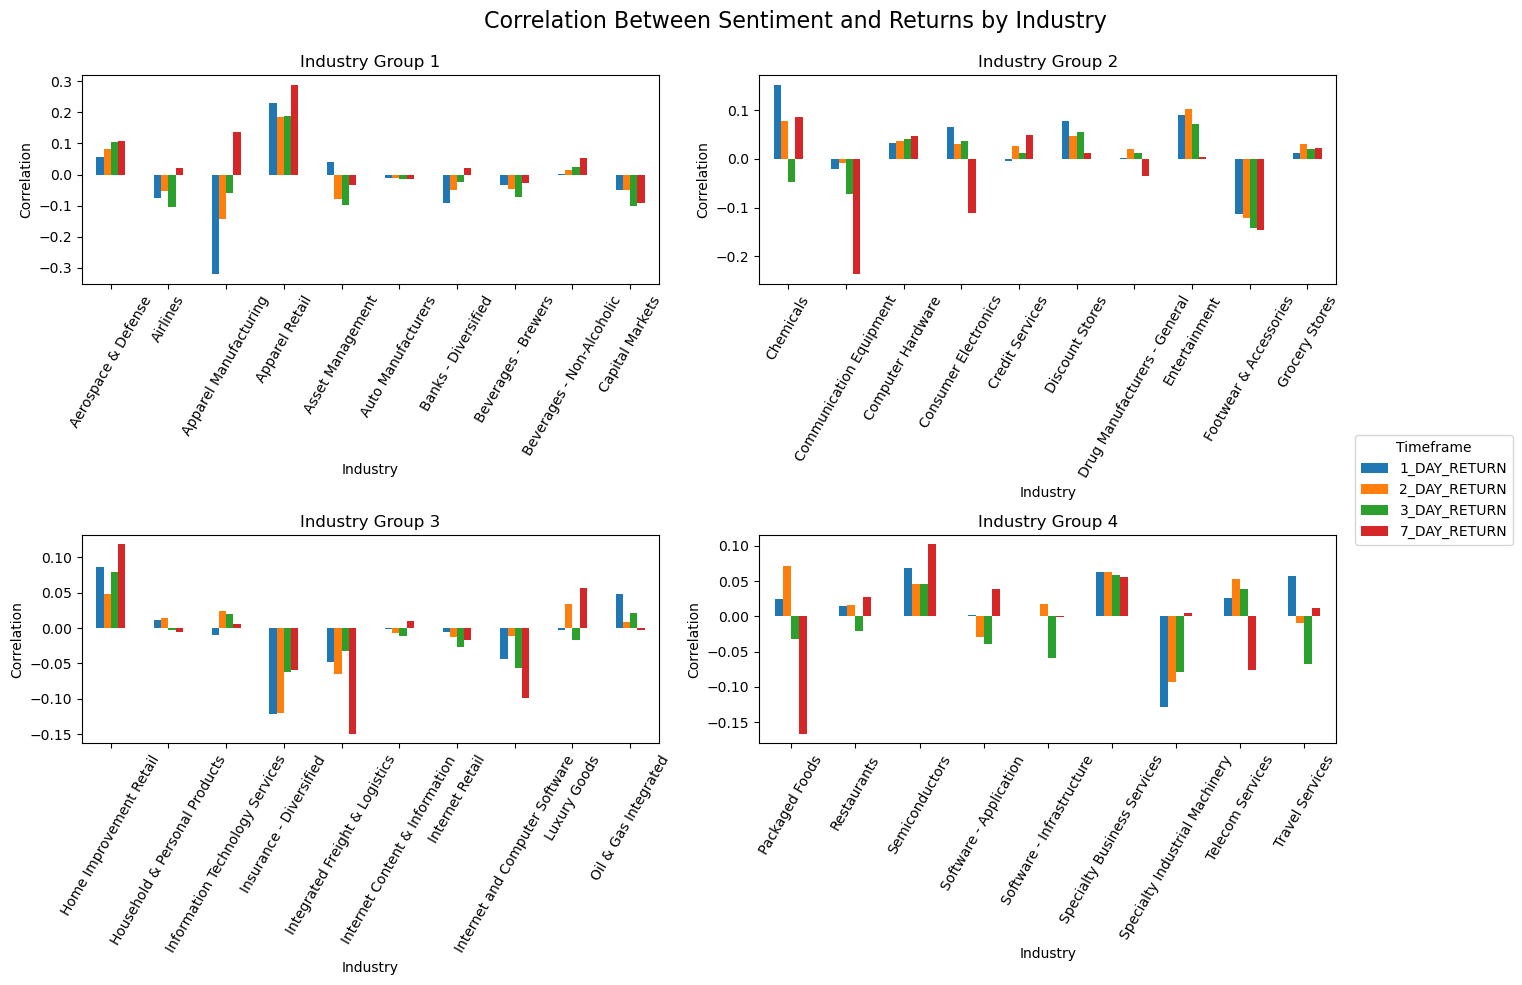

In [29]:
plot_correlation_subplots(
    correlation_df=correlation_df,
    n_groups=4,
    title="Correlation Between Sentiment and Returns by Industry"
)

We are seeing a wide variety of different correlations across industries and also within industries. Packaged foods have large swings while an industry like Speciality Business Services is more constant. Apparel Retail has consistently higher correlations while Insurance-Diversified has consistently lower correlations. About half (18 out of 39) of the industries are consistently either always positively or always negatively correlated.

Next we want to more clearly view just how each industry compares in correlation strength. The code below adds all the correlation results to a dataframe then ranks them by return period. The returned code is a ranking system of how their correlations compare to the other industries.

In [30]:
def rank_industry_correlations(correlation_results):
    """
    Convert correlation results into a DataFrame, rank industries by correlation strength,
    and display the ranked correlations.

    Parameters:
        correlation_results (dict): Dictionary containing correlation values for each timeframe.

    Returns:
        pd.DataFrame: DataFrame with ranked correlations by timeframe.
    """
    # Convert correlation results into a DataFrame
    correlation_df = pd.DataFrame(correlation_results)

    # Rank industries by correlation strength for each timeframe
    ranked_correlation = correlation_df.rank(ascending=False)

    # Display the ranked correlations
    print("Ranked Correlations by Timeframe:")
    print(ranked_correlation)

    return ranked_correlation

ranked_correlation = rank_industry_correlations(correlation_results)

Ranked Correlations by Timeframe:
                                 1_DAY_RETURN  2_DAY_RETURN  3_DAY_RETURN  \
Industry                                                                    
Aerospace & Defense                      10.0           3.0           2.0   
Airlines                                 34.0          33.0          38.0   
Apparel Manufacturing                    39.0          39.0          30.0   
Apparel Retail                            1.0           1.0           1.0   
Asset Management                         12.0          35.0          36.0   
Auto Manufacturers                       28.0          26.0          19.0   
Banks - Diversified                      35.0          32.0          22.0   
Beverages - Brewers                      30.0          30.0          34.0   
Beverages - Non-Alcoholic                22.0          20.0          11.0   
Capital Markets                          33.0          31.0          37.0   
Chemicals                                 

In [31]:
# Plot the results above

def plot_correlation_heatmap(ranked_correlation, title="Ranked Correlations Heatmap"):
    """
    Plot a heatmap of ranked correlations by industry and timeframe.

    Parameters:
        ranked_correlation (pd.DataFrame): DataFrame containing ranked correlations.
        title (str): Title for the heatmap.

    Returns:
        None: Displays the heatmap.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        ranked_correlation,
        annot=True,
        fmt=".0f",
        cmap="coolwarm",
        cbar_kws={'label': 'Rank (1 = Strongest)'}
    )
    plt.title(title, fontsize=16)
    plt.xlabel("Timeframe")
    plt.ylabel("Industry")
    plt.tight_layout()
    plt.show()

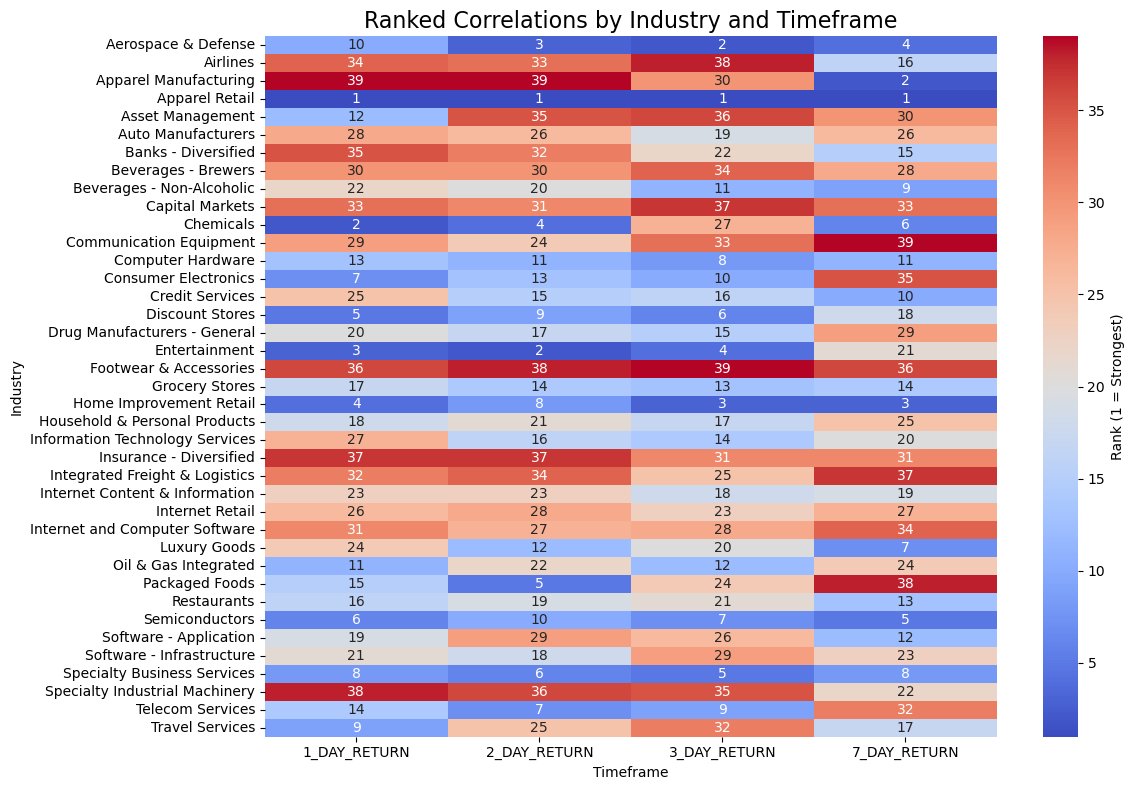

In [32]:
plot_correlation_heatmap(ranked_correlation, title="Ranked Correlations by Industry and Timeframe")

While certain industries such as Apparel Retail, Aerospace & Defense, and Home Improvement Retail are consistently higher ranked across different time periods, other industries have very large differences in rankings. For example, Packaged Foods is top 5 in correlation for 2 day returns, but last in correlation strength in 7 day returns. Some industries are more constant in their rankings, such as Capital Markets and Footwear & Accessories.

The plot above raises questions about how the correlations for each industry changes over time. We will now analyze how the correlations change from 1 day returns to 7 day returns. The function below calculates the difference in those correlations.

In [33]:
def calculate_correlation_change(correlation_df, start_col, end_col):
    """
    Calculate the change (growth or shrinkage) in correlation strength between two specified timeframes.

    Parameters:
        correlation_df (pd.DataFrame): DataFrame containing correlation data for different industries.
        start_col (str): Column name for the starting timeframe (e.g., '1_DAY_RETURN').
        end_col (str): Column name for the ending timeframe (e.g., '7_DAY_RETURN').

    Returns:
        pd.Series: A Series with industries as the index and correlation change as values.
    """
    # Calculate the change as the absolute difference
    correlation_change = correlation_df[end_col] - correlation_df[start_col]
    sorted_change = correlation_change.sort_values()
    return sorted_change


In [34]:
sorted_decay = calculate_correlation_change(correlation_df, '1_DAY_RETURN', '7_DAY_RETURN')
print("Industries with the Steepest Correlation Decay:")
print(sorted_decay)

Industries with the Steepest Correlation Decay:
Industry
Communication Equipment           -0.216774
Packaged Foods                    -0.191665
Consumer Electronics              -0.175749
Telecom Services                  -0.102024
Integrated Freight & Logistics    -0.101733
Entertainment                     -0.086229
Asset Management                  -0.073936
Discount Stores                   -0.067164
Chemicals                         -0.065268
Internet and Computer Software    -0.054385
Oil & Gas Integrated              -0.051351
Travel Services                   -0.044522
Capital Markets                   -0.040192
Drug Manufacturers - General      -0.035883
Footwear & Accessories            -0.033508
Household & Personal Products     -0.016278
Internet Retail                   -0.012290
Specialty Business Services       -0.007100
Auto Manufacturers                -0.004900
Software - Infrastructure         -0.001694
Beverages - Brewers                0.006646
Grocery Stores     

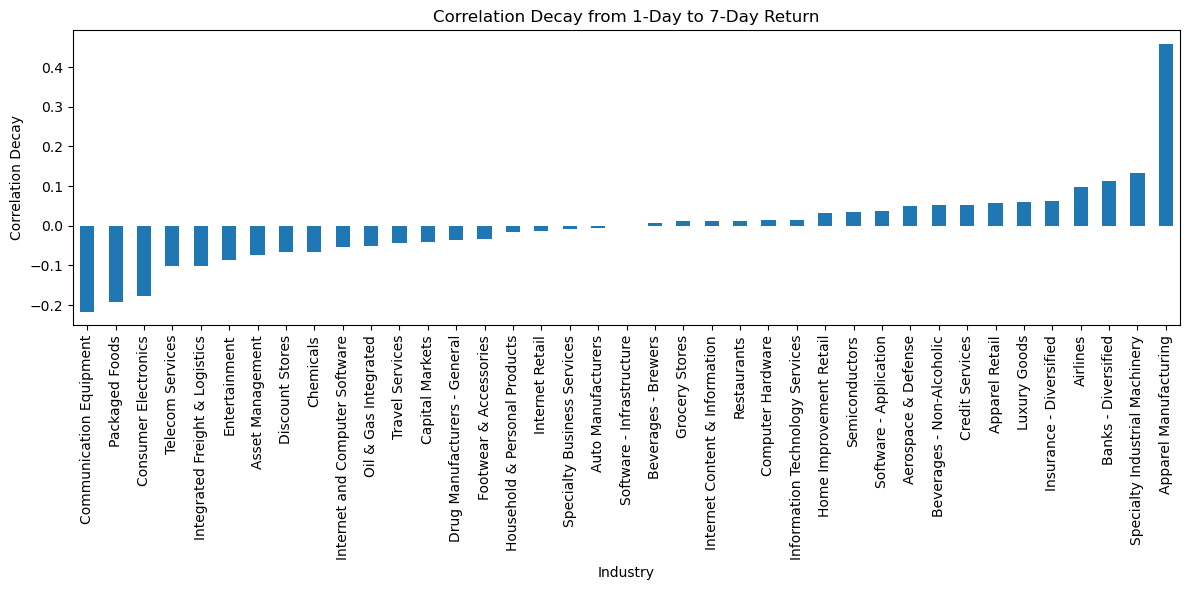

In [35]:
# Plot the results above

def plot_correlation_decay(sorted_decay, title="Correlation Decay from 1-Day to 7-Day Return"):
    """
    Plot the correlation decay for industries.

    Parameters:
        sorted_decay (pd.Series): Sorted Series of correlation decay with industries as the index.
        title (str): Title for the plot.

    Returns:
        None: Displays the bar chart.
    """
    plt.figure(figsize=(12, 6))
    sorted_decay.plot(kind='bar', title=title)
    plt.ylabel("Correlation Decay")
    plt.xlabel("Industry")
    plt.tight_layout()
    plt.show()

    # Plot the correlation decay
plot_correlation_decay(sorted_decay)

Apparel Manufacturing has a considerable positive correlation difference compared to other industries. There are several industries with higher negative correlation dacays, but these correlations are still rather small. In general, there aren't many conclusions to derive from this plot.

Expanding our analysis, the below function will incorportate correlations between volatility, volume, and sentiment scores.

In [36]:
def compute_sentiment_correlations(df, industry_col, sentiment_col, target_cols):
    """
    Compute correlations between sentiment scores and target metrics (volatility and volume) for each industry.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        industry_col (str): Column name for the industry grouping.
        sentiment_col (str): Column name for sentiment scores (e.g., 'LSTM_POLARITY').
        target_cols (list): List of column names to correlate with sentiment (e.g., ['VOLATILITY_10D', 'VOLATILITY_30D', 'PX_VOLUME']).

    Returns:
        pd.DataFrame: A DataFrame with industries as the index and sentiment correlations for each target column.
    """
    # Initialize an empty dictionary to store correlation results
    correlation_results = {}

    for col in target_cols:
        # Compute correlation between sentiment and each target column grouped by industry
        correlation_results[col] = df.groupby(industry_col).apply(
            lambda group: group[sentiment_col].corr(group[col])
        )

    # Convert results into a DataFrame
    correlation_df = pd.DataFrame(correlation_results)
    correlation_df.index.name = industry_col
    
    return correlation_df

sentiment_col = 'LSTM_POLARITY'
target_cols = ['VOLATILITY_10D', 'VOLATILITY_30D', 'PX_VOLUME']
correlation_df = compute_sentiment_correlations(df_filtered, 'Industry', sentiment_col, target_cols)

print(correlation_df.head())




C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\4084694874.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results[col] = df.groupby(industry_col).apply(
C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\4084694874.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results[col] = df.groupby(industry_col).apply(


                       VOLATILITY_10D  VOLATILITY_30D  PX_VOLUME
Industry                                                        
Aerospace & Defense          0.031373        0.007084  -0.073202
Airlines                     0.018139       -0.264961  -0.014934
Apparel Manufacturing       -0.075934        0.008172  -0.233000
Apparel Retail              -0.279387       -0.015260   0.163104
Asset Management             0.025641        0.072654  -0.036549


C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\4084694874.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results[col] = df.groupby(industry_col).apply(


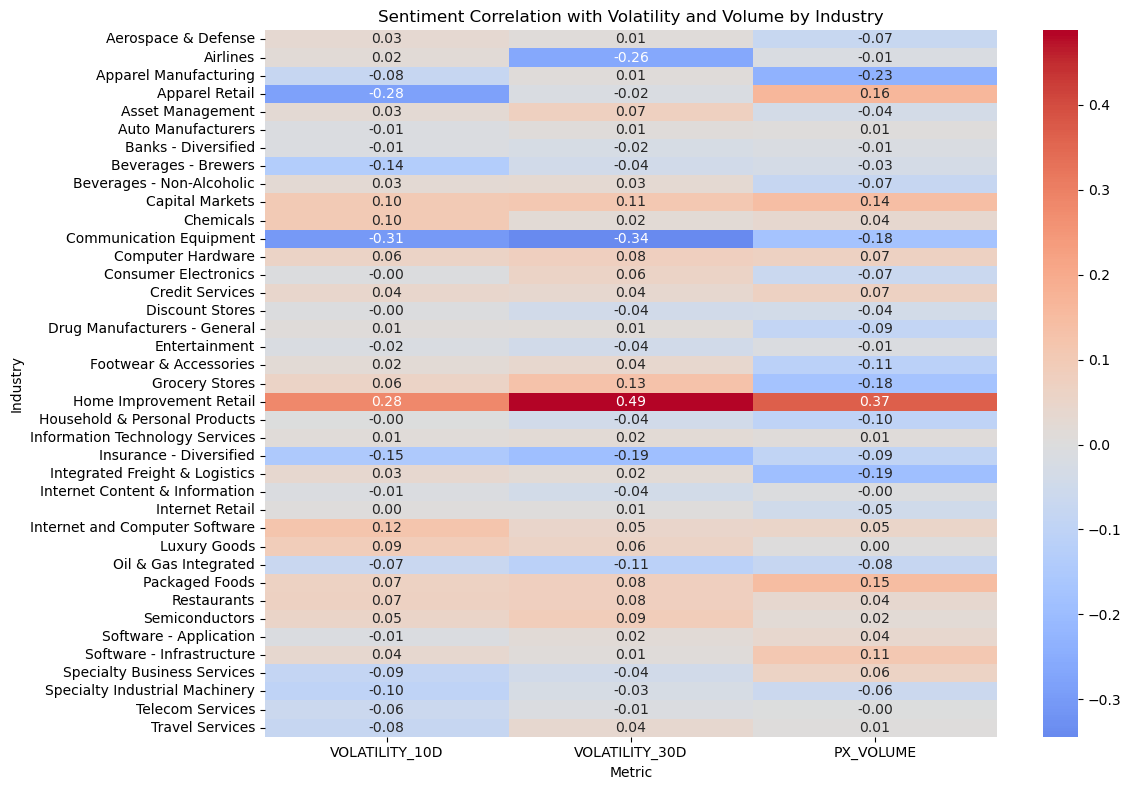

In [37]:
def plot_sentiment_correlation_heatmap(correlation_df):
    """
    Plot a heatmap to visualize sentiment correlations with volatility and volume across industries.

    Parameters:
        correlation_df (pd.DataFrame): DataFrame containing correlation values with industries as the index.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title("Sentiment Correlation with Volatility and Volume by Industry")
    plt.ylabel("Industry")
    plt.xlabel("Metric")
    plt.tight_layout()
    plt.show()

plot_sentiment_correlation_heatmap(correlation_df)


We can see that besides the Home Improvement Retail industry, no industries show significant positive correlations between volatility and sentiment, or volume and sentiment. Some industries have moderate negative correlations, but the majority of industries don't show much of a relationship.

### **Conclusion:**

Across all industries, we haven't seen any strong correlations. Apparel Retail was our strongest correlated industry, but even then it was not strong. While there were considerable differences across industries (and even within) industries, it appears that using an industry level analysis does not
lead us to be able to conclusively say that tweet sentiments affect stock returns, volatility, or volume. However, one trend we did notice was how industries that provide a direct product used by consumers trends to rank higher in correlation between sentiment polarity and returns. Besides, Apparel Retail, industries such as Entertainment, Discount Stores, and Home Improvement are all stronger in correlation across the board compared to other industries. Industries that play more of a background role in society like Capital Markets, Insurance, Freight, and Industrial Machinery are consistently weakeast in their analysis. Despite this relationship, we still must consider how none of the correlations are strong, and thus, we still can't say that sentiment returns strongly affect stock returns by industry.



---



## **Research Direction 3: Determine the Most Sensitive Stocks to Tweet Sentiment**

Clean and Preprocess the Data

In [38]:
def filter_columns(df, columns_to_keep):
    """
    Filter relevant columns from the dataset.

    Parameters:
        df (pd.DataFrame): Original dataset.
        columns_to_keep (list): List of column names to keep.

    Returns:
        pd.DataFrame: Filtered dataset.
    """
    return df[columns_to_keep]

In [39]:
columns_to_keep = ['STOCK', 'LSTM_POLARITY', '1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN']
df_relevant = filter_columns(df, columns_to_keep)

Analyze sentiment sensitivity for each stock:

To measure 'sensitivity', we calculate the correlation between sentiment polarity (LSTM) and stock returns for each stock. A higher absolute correlation indicates greater sensitivity.

In [40]:
def calculate_correlations(df, group_by_col, correlation_pairs):
    """
    Calculate correlations between specified pairs of columns, grouped by a specific column.

    Parameters:
        df (pd.DataFrame): Cleaned dataset.
        group_by_col (str): Column name to group the dataset by.
        correlation_pairs (list of tuple): List of column pairs to calculate correlations for.

    Returns:
        pd.DataFrame: DataFrame containing correlation results for each group.
    """
    correlation_results = []
    for group, data in df.groupby(group_by_col):
        result = {'STOCK': group}
        for col1, col2 in correlation_pairs:
            result[f'{col1}_CORRELATION'] = data[col1].corr(data[col2])
        correlation_results.append(result)
    return pd.DataFrame(correlation_results)

In [41]:
correlation_pairs = [('LSTM_POLARITY', '1_DAY_RETURN')]
df_correlation = calculate_correlations(df, 'STOCK', correlation_pairs)

c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Identify most sensitive stocks:

From the correlation results, identify the stocks with the highest correlations for LSTM sentiment. These are the stocks most sensitive to tweet sentiments.

Visualize correlation results:

Visualization helps communicate results effectively. We create:


*   Bar Chart: To show the top stocks with the highest sensitivity to sentiment.
*   Scatter Plot: To illustrate the relationship between sentiment and returns for a specific stock.

In [42]:
def plot_top_stocks(df, column, n=10):
    """
    Plot a bar chart for the top N stocks based on the specified column.

    Parameters:
        df (pd.DataFrame): DataFrame containing stock correlation data.
        column (str): Column name to sort by.
        n (int): Number of top stocks to display.
    """
    top_stocks = df.nlargest(n, column)
    plt.figure(figsize=(10, 6))
    plt.bar(top_stocks['STOCK'], top_stocks[column], alpha=0.7)
    plt.title(f'Top {n} Stocks Most Sensitive to {column}')
    plt.xlabel('Stock')
    plt.ylabel(f'Correlation ({column})')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

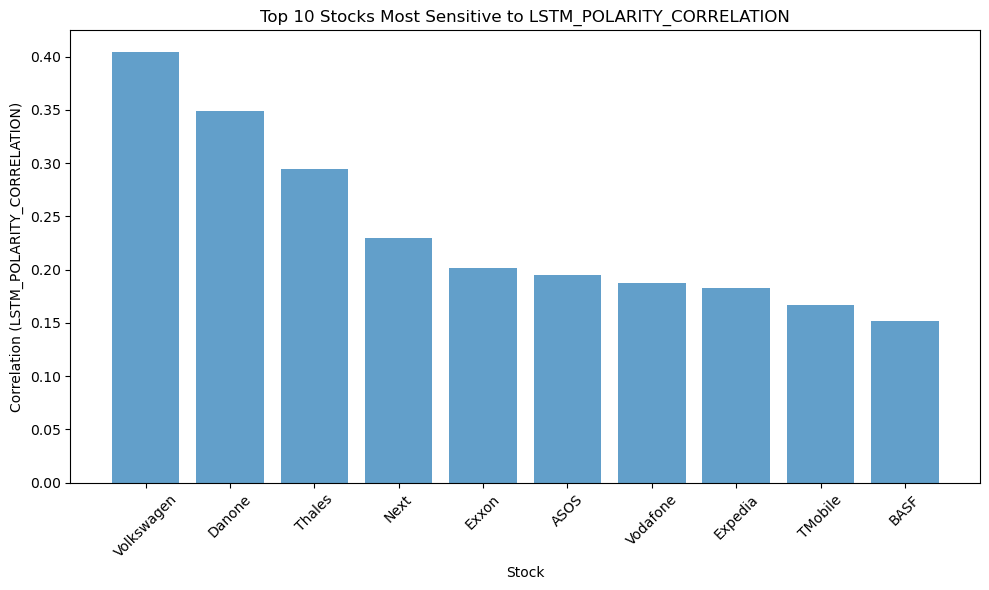

In [43]:
plot_top_stocks(df_correlation, 'LSTM_POLARITY_CORRELATION', n=10)



*   Industries Matter: The stocks in this chart span multiple industries (media, consumer goods, automotive, and telecom). The differences in correlation might reflect varying degrees of public attention and sentiment-driven trading in these sectors.
*   Investor Behavior: High sensitivity stocks like Volkswagen may attract short-term or sentiment-driven traders, while lower sensitivity stocks may appeal to more long-term or fundamentally driven investors.
*   Potential Practical Implications: Companies with higher sensitivity might benefit from actively monitoring and managing their public relations and social media narratives to influence investor sentiment positively.





In [44]:
def plot_scatter_for_stocks(df, stock_list, x_col, y_col):
    """
    Generate scatter plots for specified stocks showing relationships between two columns.

    Parameters:
        df (pd.DataFrame): Cleaned dataset.
        stock_list (list): List of stock names to plot.
        x_col (str): Column name for the x-axis.
        y_col (str): Column name for the y-axis.
    """
    for stock in stock_list:
        stock_data = df[df['STOCK'] == stock]
        plt.figure(figsize=(8, 6))
        plt.scatter(stock_data[x_col], stock_data[y_col], alpha=0.6)
        plt.title(f'Relationship Between {x_col} and {y_col} for {stock}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

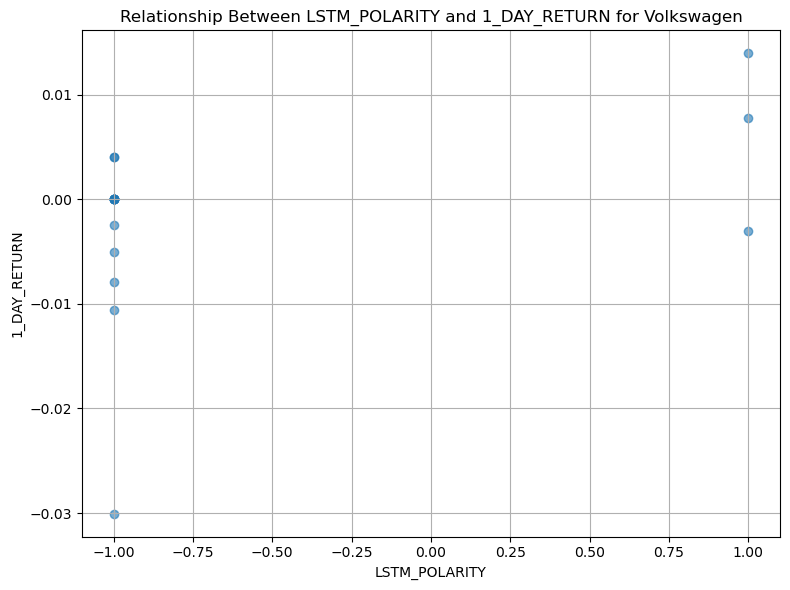

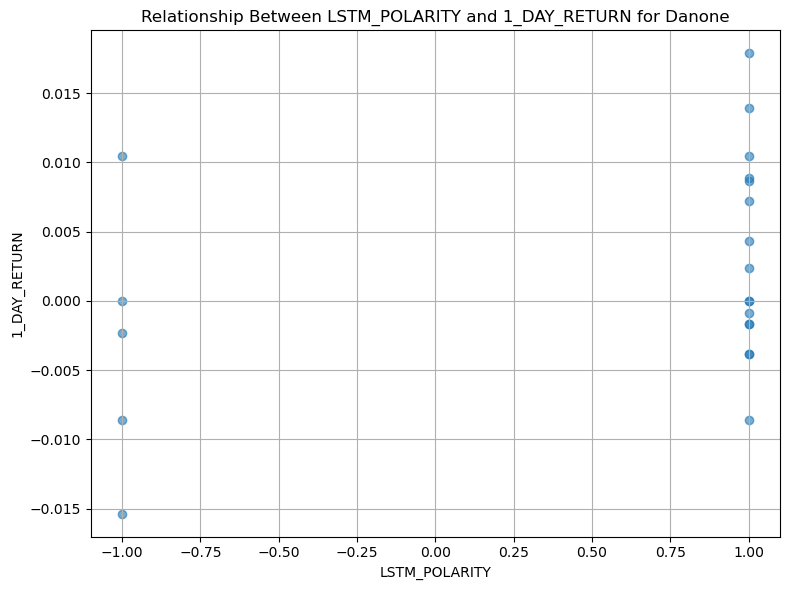

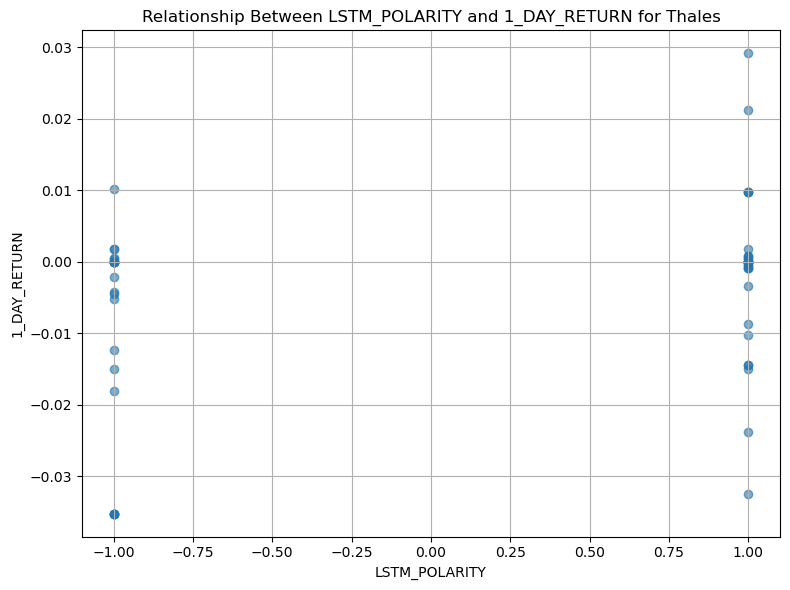

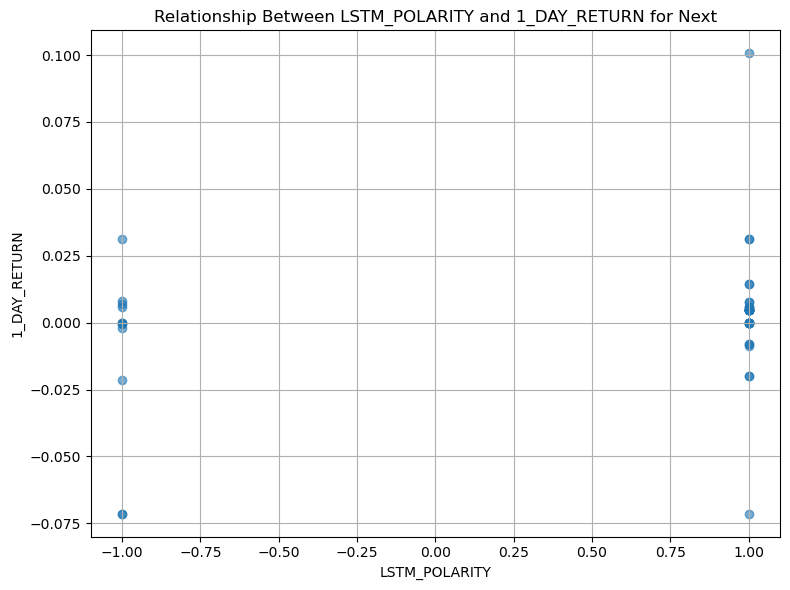

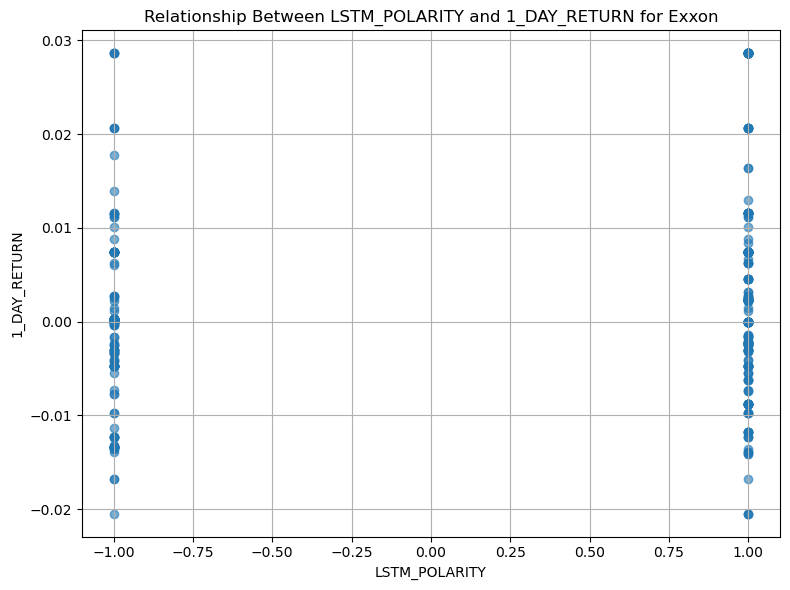

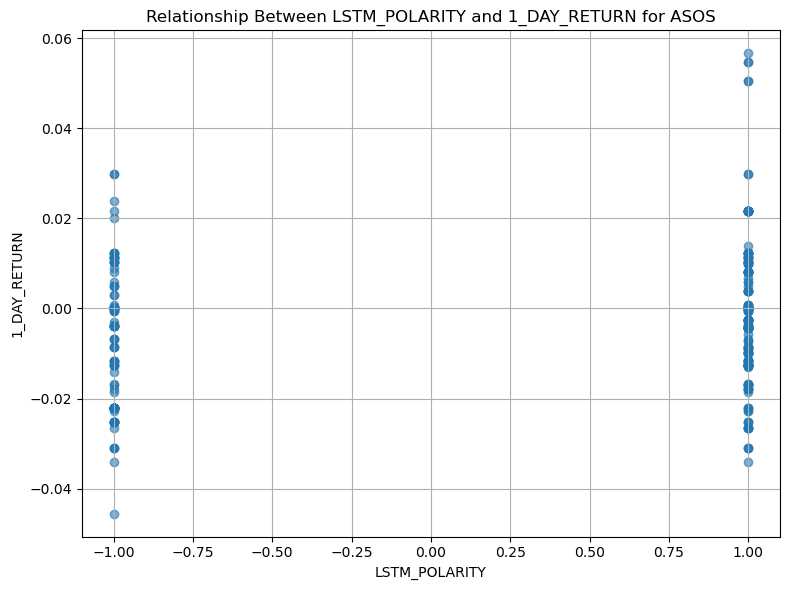

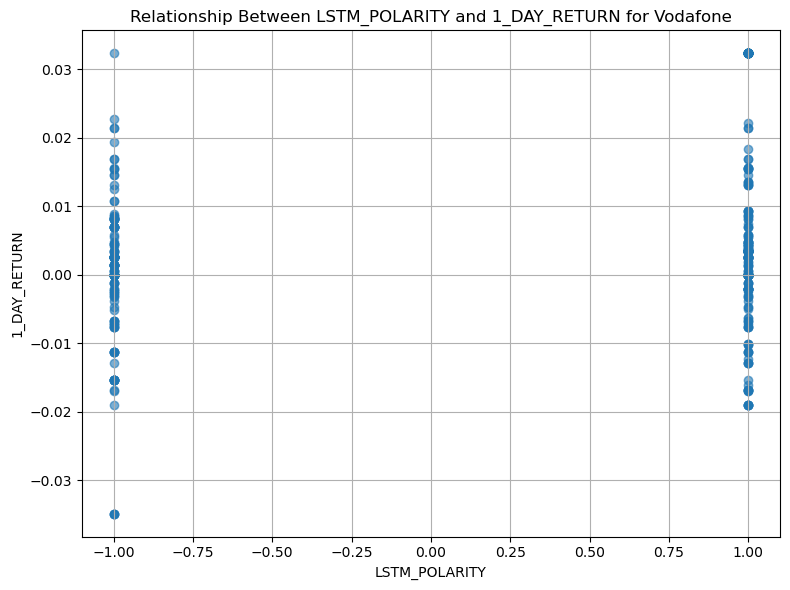

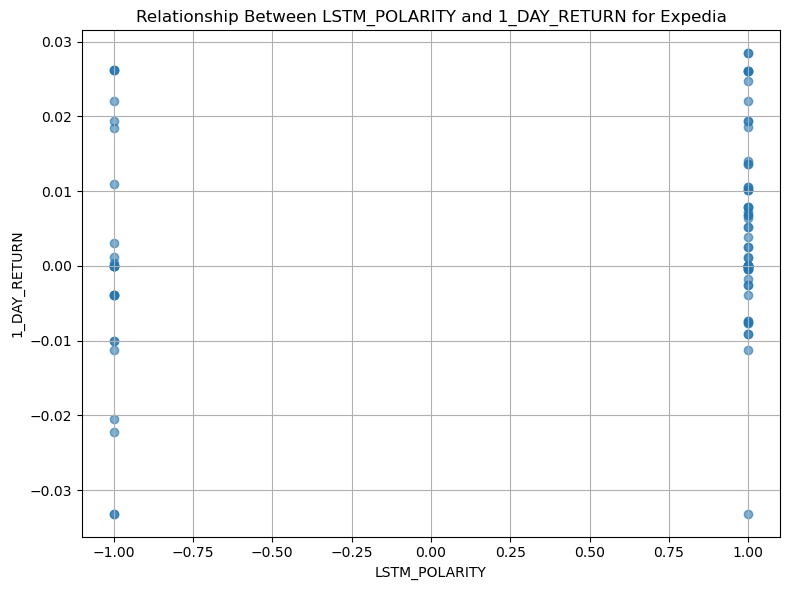

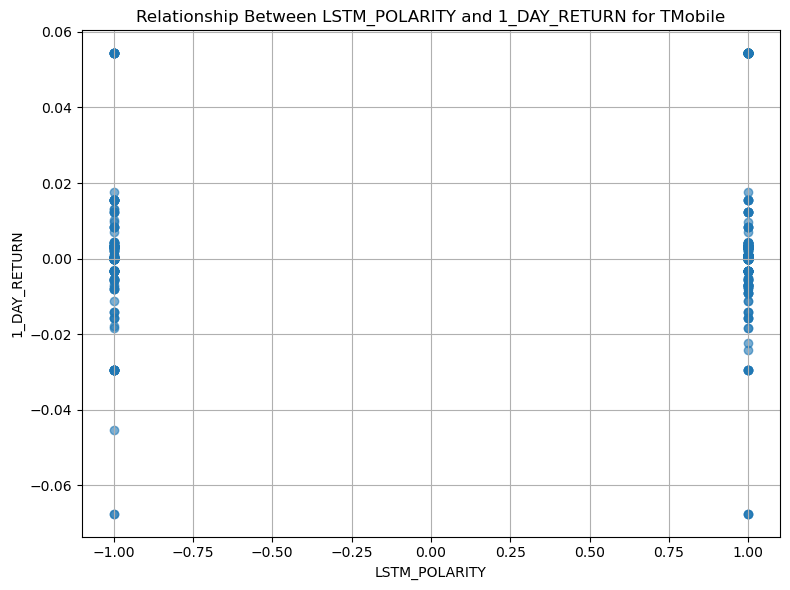

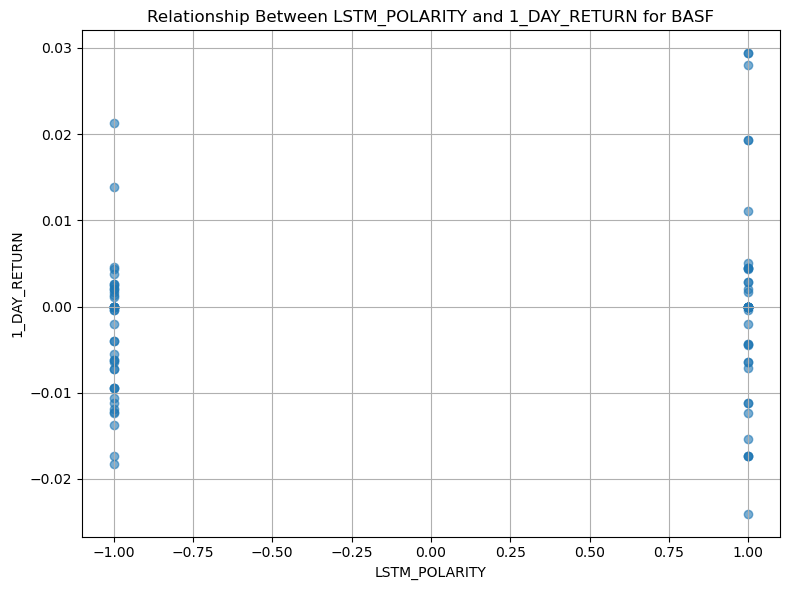

In [45]:
top_10_stocks = df_correlation.nlargest(10, 'LSTM_POLARITY_CORRELATION')['STOCK'].tolist()
plot_scatter_for_stocks(df, top_10_stocks, 'LSTM_POLARITY', '1_DAY_RETURN')



*   Positive Trend: In some scatter plots, there is evidence of a positive correlation between LSTM sentiment polarity and 1-day returns. Stocks with higher LSTM polarity scores tend to exhibit higher 1-day returns.
*   Predictive Power of Sentiment: For highly sensitive stocks like Volkswagen and Danone, sentiment analysis tools can provide reliable signals for short-term trading decisions.
*   External Factors Beyond Sentiment: Some plots, like those for Exxon and BASF, suggest that other factors may heavily influence stock returns, possibly diminishing the impact of sentiment.





### **Sub Direction 1: Volume-Traded Perspective**

Assumption: Stocks with higher trading volumes might exhibit greater sensitivity to tweet sentiments because they attract more traders who react to public information.

In [46]:
def calculate_average_volume_and_correlation(df, group_by_col, volume_col, return_col, polarity_col):
    """
    Calculate average trading volume and sentiment correlation for each stock.

    Parameters:
        df (pd.DataFrame): The dataset containing stock and sentiment data.
        group_by_col (str): The column to group by (e.g., 'STOCK').
        volume_col (str): The column representing trading volume (e.g., 'PX_VOLUME').
        return_col (str): The column representing returns (e.g., '1_DAY_RETURN').
        polarity_col (str): The column representing sentiment polarity (e.g., 'LSTM_POLARITY').

    Returns:
        pd.DataFrame: DataFrame containing average trading volume and correlation for each group.
    """
    correlation_func = lambda x: x.corr(df.loc[x.index, return_col])
    volume_data = df.groupby(group_by_col).agg({
        volume_col: 'mean',
        polarity_col: correlation_func
    }).reset_index()
    volume_data.rename(columns={volume_col: 'AVG_VOLUME', polarity_col: 'LSTM_CORRELATION'}, inplace=True)
    return volume_data

In [47]:
def plot_scatter(df, x_col, y_col, title, xlabel, ylabel, color='purple'):
    """
    Plot trading volume vs sentiment correlation scatter plot.

    Parameters:
        df (pd.DataFrame): The dataset containing volume and correlation data.
        x_col (str): The column to plot on the x-axis (e.g., 'AVG_VOLUME').
        y_col (str): The column to plot on the y-axis (e.g., 'LSTM_CORRELATION').
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        color (str): Color of the scatter plot points.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.7, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.axvline(0, color = 'gray', linestyle = '--', linewidth = 0.8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [48]:
def get_top_stocks(df, sort_cols, n=5):
    """
    Identify the top stocks by volatility and their correlations.

    Parameters:
        df (pd.DataFrame): The dataset containing volatility and correlation data.
        sort_by_cols (list): List of columns to sort by.
        n (int): Number of top stocks to return.

    Returns:
        pd.DataFrame: Top n stocks sorted by the specified columns.
    """
    return df.sort_values(by=sort_cols, ascending=False).head(n)

c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


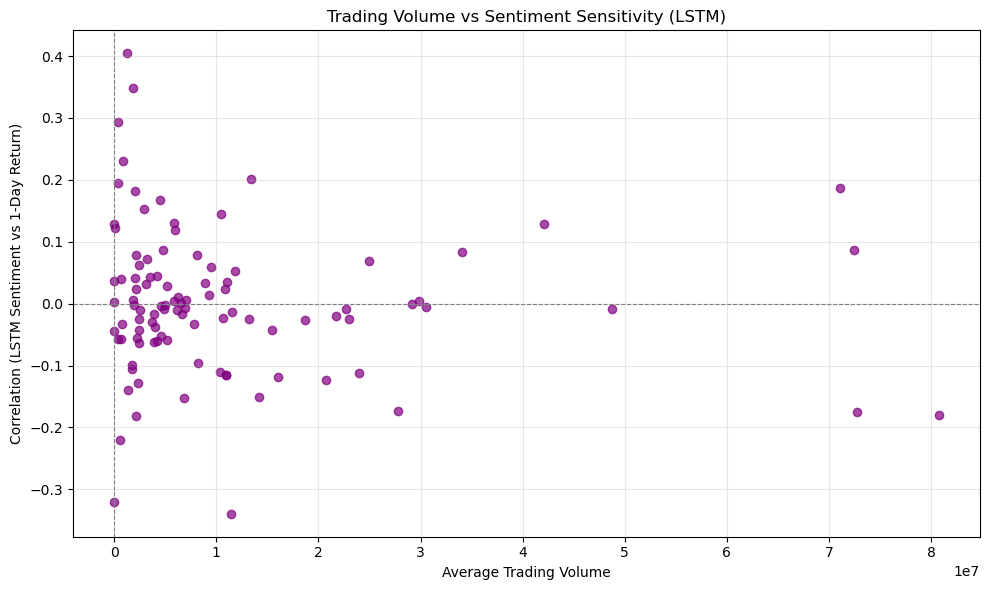

               STOCK    AVG_VOLUME  LSTM_CORRELATION
77         Santander  8.076309e+07         -0.180441
40  General Electric  7.277066e+07         -0.175711
14   Bank of America  7.247274e+07          0.087381
91          Vodafone  7.112379e+07          0.187255
38              Ford  4.878010e+07         -0.009418


In [49]:
if __name__ == "__main__":
    volume_col = 'PX_VOLUME'
    return_col = '1_DAY_RETURN'
    polarity_col = 'LSTM_POLARITY'

    #Calculate average volume and correlation
    volume_data = calculate_average_volume_and_correlation(df, 'STOCK', volume_col, return_col, polarity_col)

    #Plot volume vs correlation
    plot_scatter(
        volume_data,
        x_col='AVG_VOLUME',
        y_col='LSTM_CORRELATION',
        title='Trading Volume vs Sentiment Sensitivity (LSTM)',
        xlabel='Average Trading Volume',
        ylabel='Correlation (LSTM Sentiment vs 1-Day Return)'
    )

    #Identify top high-volume stocks
    top_volume_stocks = get_top_stocks(volume_data, 'AVG_VOLUME', n=5)
    print(top_volume_stocks)



*   Weak Overall Relationship: The scatter plot shows a weak relationship between average trading volume and LSTM sentiment sensitivity (correlation with 1-day returns). Higher trading volumes do not necessarily result in stronger sentiment sensitivity (positive or negative).
*   High-Volume Stocks with Positive Correlation: Stocks like Vodafone (0.187) show that high-volume stocks can be moderately sensitive to sentiment. Traders could prioritize such stocks for sentiment-based strategies.
*   Contrarian Behavior in High-Volume Stocks: Stocks like Santander and General Electric demonstrate significant negative correlations despite high volumes. This contrarian response could indicate market overreaction to sentiment or other external influences.
*   High-Volume Stocks with Weak Correlation: Stocks like Ford (-0.009) and Bank of America (0.087) suggest stability against sentiment-driven fluctuations, might making them attractive for long-term investments.





### **Sub Direction 2: Sentiment Consistency**

Assumption: Stocks with consistent sentiment polarity (e.g. mostly positive or negative) might exhibit weaker sensitivity, while those with diverse sentiments may show stronger reactions.

In [50]:
def calculate_positive_proportion(df, group_by_col, polarity_col):
    """
    Calculate the proportion of positive sentiments (LSTM_POLARITY == 1) for each stock.

    Parameters:
        df (pd.DataFrame): The dataset containing stock and sentiment data.
        group_by_col (str): The column to group by (e.g., 'STOCK').
        polarity_col (str): The column representing sentiment polarity (e.g., 'LSTM_POLARITY').

    Returns:
        pd.DataFrame: DataFrame containing the proportion of positive sentiments for each group.
    """
    positive_proportion = df.groupby(group_by_col).agg({
        polarity_col: lambda x: (x == 1).mean()  # Proportion of positive sentiments
    }).reset_index()
    positive_proportion.rename(columns={polarity_col: 'POSITIVE_PROPORTION'}, inplace=True)
    return positive_proportion

In [51]:
def calculate_correlation(df, group_by_col, polarity_col, return_col):
    """
    Calculate the correlation between LSTM polarity and returns for each stock.

    Parameters:
        df (pd.DataFrame): The dataset containing stock and sentiment data.
        group_by_col (str): The column to group by (e.g., 'STOCK').
        polarity_col (str): The column representing sentiment polarity (e.g., 'LSTM_POLARITY').
        return_col (str): The column representing returns (e.g., '1_DAY_RETURN').

    Returns:
        pd.DataFrame: DataFrame containing the correlation for each group.
    """
    correlation_data = df.groupby(group_by_col).agg({
        polarity_col: lambda x: x.corr(df.loc[x.index, return_col])
    }).reset_index()
    correlation_data.rename(columns={polarity_col: 'LSTM_CORRELATION'}, inplace=True)
    return correlation_data

In [52]:
def merge_sentiment_data(proportion_df, correlation_df, on_col):
    """
    Merge the positive proportion and correlation data on the given column.

    Parameters:
        proportion_df (pd.DataFrame): DataFrame with positive sentiment proportions.
        correlation_df (pd.DataFrame): DataFrame with sentiment correlations.
        on_col (str): Column name to merge on (e.g., 'STOCK').

    Returns:
        pd.DataFrame: Merged DataFrame containing sentiment proportions and correlations.
    """
    return pd.merge(proportion_df, correlation_df, on=on_col)

In [53]:
def get_balanced_sentiment_stocks(df, proportion_col, correlation_col, lower_bound=0.4, upper_bound=0.6, n=5):
    """
    Identify stocks with balanced sentiments and high correlations.

    Parameters:
        df (pd.DataFrame): The dataset containing sentiment balance data.
        proportion_col (str): Column name for positive sentiment proportions.
        correlation_col (str): Column name for sentiment correlations.
        lower_bound (float): Lower bound for balanced sentiment proportions (default: 0.4).
        upper_bound (float): Upper bound for balanced sentiment proportions (default: 0.6).
        n (int): Number of top stocks to return (default: 5).

    Returns:
        pd.DataFrame: Top n stocks with balanced sentiments and high correlations.
    """
    filtered_stocks = df.loc[df[proportion_col].between(lower_bound, upper_bound)]
    return filtered_stocks.sort_values(by=correlation_col, ascending=False).head(n)

c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


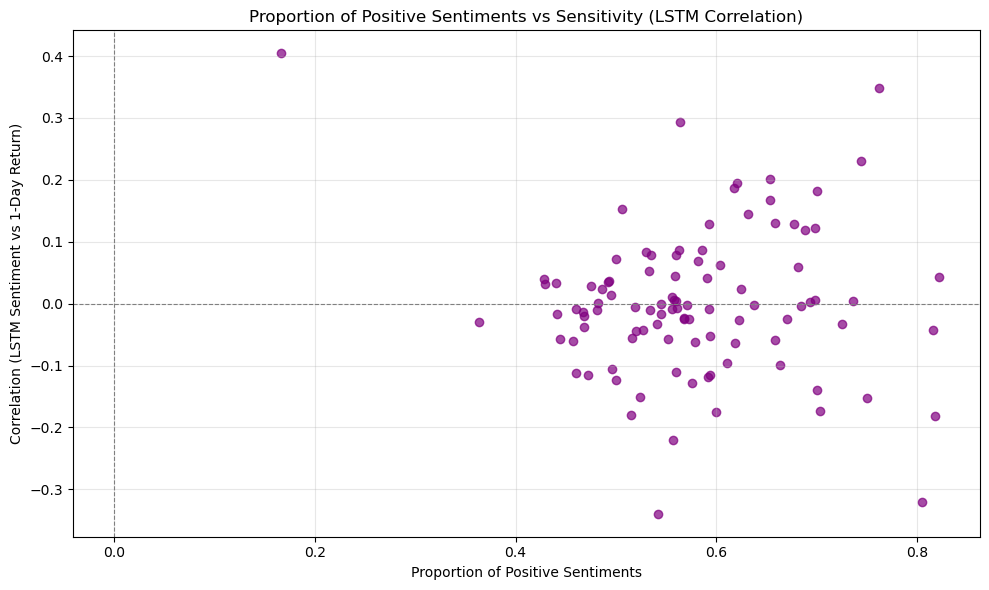

              STOCK  POSITIVE_PROPORTION  LSTM_CORRELATION
84           Thales             0.563636          0.294002
11             BASF             0.505747          0.152099
2              AT&T             0.592803          0.129430
14  Bank of America             0.563380          0.087381
49       Home Depot             0.585366          0.086606


In [54]:
if __name__ == "__main__":
    polarity_col = 'LSTM_POLARITY'
    return_col = '1_DAY_RETURN'

    #Calculate positive sentiment proportion
    positive_proportion = calculate_positive_proportion(df, 'STOCK', polarity_col)

    #Calculate correlation between polarity and returns
    correlation_data = calculate_correlation(df, 'STOCK', polarity_col, return_col)

    #Merge the results
    sentiment_balance = merge_sentiment_data(positive_proportion, correlation_data, on_col='STOCK')

    #Plot positive proportion vs correlation
    plot_scatter(
        sentiment_balance,
        x_col='POSITIVE_PROPORTION',
        y_col='LSTM_CORRELATION',
        title='Proportion of Positive Sentiments vs Sensitivity (LSTM Correlation)',
        xlabel='Proportion of Positive Sentiments',
        ylabel='Correlation (LSTM Sentiment vs 1-Day Return)'
    )

    #Identify stocks with balanced sentiments
    balanced_sentiment_stocks = get_balanced_sentiment_stocks(
        sentiment_balance,
        proportion_col='POSITIVE_PROPORTION',
        correlation_col='LSTM_CORRELATION',
        lower_bound=0.4,
        upper_bound=0.6,
        n=5
    )
    print(balanced_sentiment_stocks)

Clustering in proportion of positive sentiments >0.8 and <0.3 suggests that stocks with extreme sentiment dominance (mostly positive or mostly negative) may have unusual or disproportionate correlations with stock returns.

### **Sub Direction 3: Sentiment Source Comparison**

Assumption: Different sentiment analysis models (e.g., LSTM vs TextBlob) might yield different sensitivities for the same stock.

In [55]:
def calculate_sentiment_correlations(df, group_by_col, polarity_cols, return_col):
    """
    Calculate correlations between sentiment polarities and returns for each stock.

    Parameters:
        df (pd.DataFrame): The dataset containing stock and sentiment data.
        group_by_col (str): The column to group by (e.g., 'STOCK').
        polarity_cols (list): List of sentiment polarity columns to correlate (e.g., ['LSTM_POLARITY', 'TEXTBLOB_POLARITY']).
        return_col (str): The column representing returns (e.g., '1_DAY_RETURN').

    Returns:
        pd.DataFrame: DataFrame containing correlations for each polarity source by stock.
    """
    agg_dict = {
        col: lambda x: x.corr(df.loc[x.index, return_col]) for col in polarity_cols
    }
    sentiment_comparison = df.groupby(group_by_col).agg(agg_dict).reset_index()
    sentiment_comparison.columns = [group_by_col] + [f"{col.split('_')[0]}_CORRELATION" for col in polarity_cols]
    return sentiment_comparison

In [56]:
def calculate_correlation_between_sources(df, col1, col2):
    """
    Calculate the correlation between two sentiment correlation sources.

    Parameters:
        df (pd.DataFrame): The dataset containing sentiment comparison data.
        col1 (str): The first column to correlate (e.g., 'LSTM_CORRELATION').
        col2 (str): The second column to correlate (e.g., 'TEXTBLOB_CORRELATION').

    Returns:
        float: Correlation value between the two columns.
    """
    return df[col1].corr(df[col2])

c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Public\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


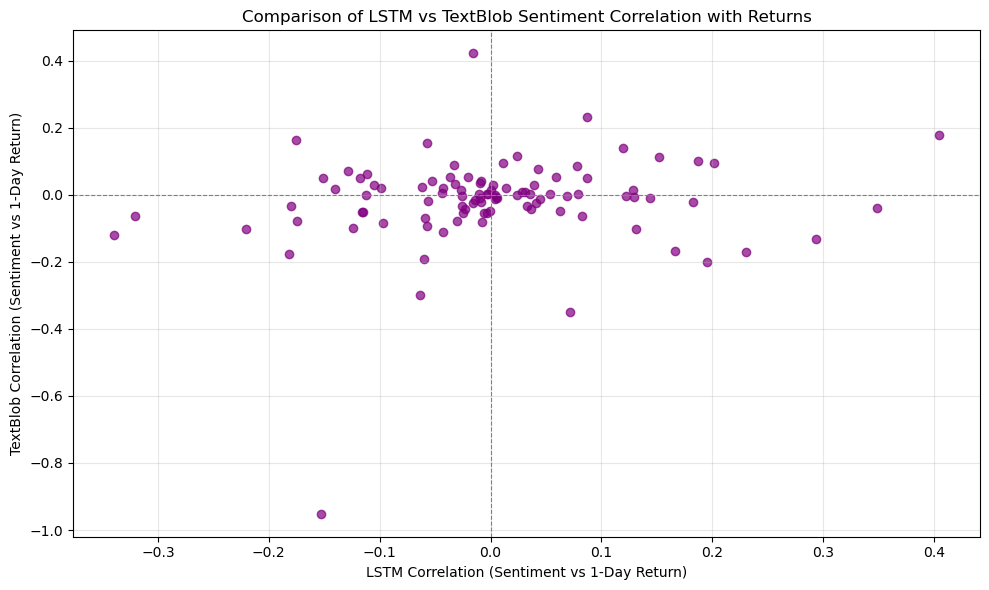

Correlation between LSTM and TextBlob correlations: 0.15187562258225007
Top 5 stocks by LSTM correlation:
         STOCK  LSTM_CORRELATION  TEXTBLOB_CORRELATION
92  Volkswagen          0.404378              0.177967
30      Danone          0.348756             -0.038898
84      Thales          0.294002             -0.133227
65        Next          0.230050             -0.171578
35       Exxon          0.201543              0.093523


In [57]:
if __name__ == "__main__":
    polarity_cols = ['LSTM_POLARITY', 'TEXTBLOB_POLARITY']
    return_col = '1_DAY_RETURN'

    #Calculate sentiment correlations
    sentiment_source_comparison = calculate_sentiment_correlations(df, 'STOCK', polarity_cols, return_col)

    #Plot sentiment correlation comparison
    plot_scatter(
        sentiment_source_comparison,
        x_col='LSTM_CORRELATION',
        y_col='TEXTBLOB_CORRELATION',
        title='Comparison of LSTM vs TextBlob Sentiment Correlation with Returns',
        xlabel='LSTM Correlation (Sentiment vs 1-Day Return)',
        ylabel='TextBlob Correlation (Sentiment vs 1-Day Return)'
    )

    #Calculate correlation between LSTM and TextBlob correlation values
    source_correlation = calculate_correlation_between_sources(
        sentiment_source_comparison,
        col1='LSTM_CORRELATION',
        col2='TEXTBLOB_CORRELATION'
    )
    print(f"Correlation between LSTM and TextBlob correlations: {source_correlation}")

    #Identify top stocks by LSTM correlation
    top_stocks = get_top_stocks(sentiment_source_comparison, 'LSTM_CORRELATION', n=5)
    print("Top 5 stocks by LSTM correlation:")
    print(top_stocks)



*   Weak Agreement Between LSTM and TextBlob: The result indicates a weak positive correlation (0.152) between LSTM and TextBlob correlations with stock returns. This suggests that the two sentiment analysis methods sometimes produce diverging insights regarding sentiment-driven stock price movements.
*   Diverging Quadrants: A few stocks are in the positive LSTM but negative TextBlob correlation quadrant (e.g., Danone, Thales, and Next). This indicates that while LSTM captures a positive relationship with returns, TextBlob might interpret sentiment differently or fail to capture relevant nuances.
*   LSTM Outperforms TextBlob for Positive Correlations: LSTM identifies stronger positive correlations for top stocks compared to TextBlob, suggesting it might better capture the sentiment signals influencing short-term stock returns.
*   TextBlob Shows Divergence: TextBlob sometimes produces negative correlations where LSTM finds positive ones (e.g., Danone, Thales, and Next). This could reflect limitations in TextBlob's simpler rule-based approach compared to LSTM's neural network-based analysis.
*   Practical Implications: Relying solely on one sentiment analysis method could lead to missed opportunities or incorrect predictions. A hybrid approach combining multiple sources or a better model for sentiment analysis could provide a more comprehensive understanding.







### **Sub Direction 4: Tweet Characteristics**

Assumption: The content, length, or frequency of tweets about a stock might influence its sensitivity to sentiments.

In [58]:
def prepare_tweet_data(df, tweet_col):
    """
    Prepare tweet data by handling missing values, calculating tweet length,
    and counting hashtags and mentions.

    Parameters:
        df (pd.DataFrame): The dataset containing tweet data.
        tweet_col (str): The column name containing tweet text (e.g., 'TWEET').

    Returns:
        pd.DataFrame: Updated DataFrame with additional columns for tweet characteristics.
    """
    df[tweet_col] = df[tweet_col].fillna('').astype(str)
    df['TWEET_LENGTH'] = df[tweet_col].apply(len)
    df['NUM_HASHTAGS'] = df[tweet_col].str.count('#')
    df['NUM_MENTIONS'] = df[tweet_col].str.count('@')
    return df

In [59]:
def calculate_tweet_characteristics(df, length_col, bins, polarity_col, return_col):
    """
    Group tweets by length categories and calculate sentiment correlations
    and average hashtags and mentions.

    Parameters:
        df (pd.DataFrame): The dataset containing tweet characteristics and sentiment data.
        length_col (str): The column name representing tweet length (e.g., 'TWEET_LENGTH').
        bins (list): List of bin edges for categorizing tweet lengths.
        polarity_col (str): The column representing sentiment polarity (e.g., 'LSTM_POLARITY').
        return_col (str): The column representing returns (e.g., '1_DAY_RETURN').

    Returns:
        pd.DataFrame: DataFrame containing grouped statistics by tweet length categories.
    """
    tweet_characteristics = df.groupby(pd.cut(df[length_col], bins=bins)).agg({
        polarity_col: lambda x: x.corr(df.loc[x.index, return_col]),
        'NUM_HASHTAGS': 'mean',
        'NUM_MENTIONS': 'mean',
    }).reset_index()
    tweet_characteristics.columns = [
        'TWEET_LENGTH_RANGE',
        'LSTM_CORRELATION',
        'AVG_HASHTAGS',
        'AVG_MENTIONS',
    ]
    return tweet_characteristics

In [60]:
def plot_tweet_correlation_by_length(df, x_col, y_col, title, xlabel, ylabel):
    """
    Plot correlations by tweet length range.

    Parameters:
        df (pd.DataFrame): The dataset containing tweet length and correlation data.
        x_col (str): The column representing tweet length ranges (e.g., 'TWEET_LENGTH_RANGE').
        y_col (str): The column representing sentiment correlations (e.g., 'LSTM_CORRELATION').
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df[x_col].astype(str), df[y_col], label='LSTM Correlation', marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_94592\2970061208.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tweet_characteristics = df.groupby(pd.cut(df[length_col], bins=bins)).agg({


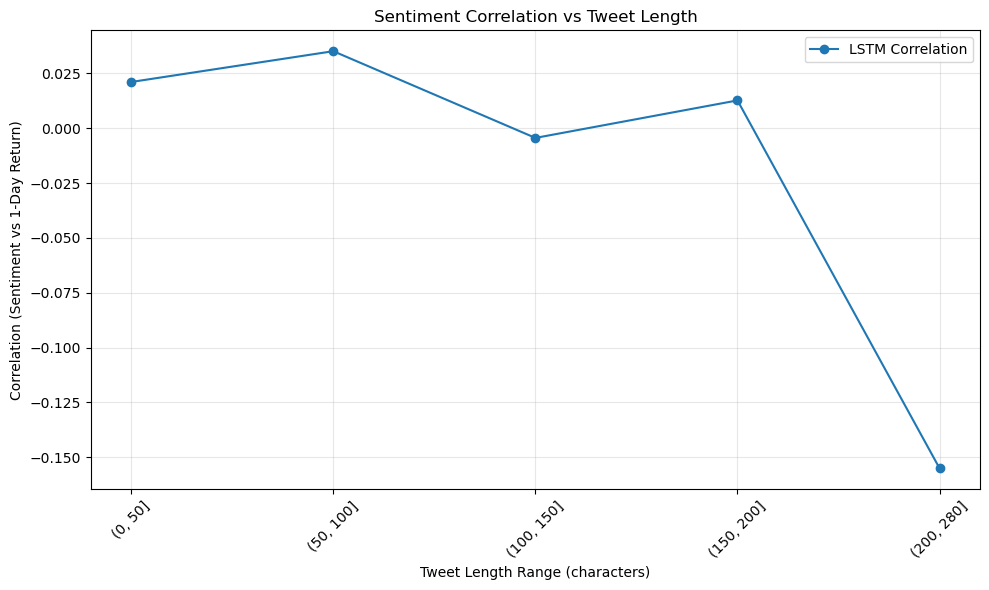

  TWEET_LENGTH_RANGE  LSTM_CORRELATION  AVG_HASHTAGS  AVG_MENTIONS
0            (0, 50]          0.021104      0.078000      0.494000
1          (50, 100]          0.035146      0.131070      0.698053
2         (100, 150]         -0.004401      0.296791      1.014731
3         (150, 200]          0.012699      0.439273      1.165151
4         (200, 280]         -0.155088      1.359413      1.359413


In [61]:
if __name__ == "__main__":
    tweet_col = 'TWEET'
    polarity_col = 'LSTM_POLARITY'
    return_col = '1_DAY_RETURN'
    length_col = 'TWEET_LENGTH'
    bins = [0, 50, 100, 150, 200, 280]

    #Prepare tweet data
    df = prepare_tweet_data(df, tweet_col)

    #Calculate tweet characteristics
    tweet_characteristics = calculate_tweet_characteristics(df, length_col, bins, polarity_col, return_col)

    #Plot sentiment correlation by tweet length
    plot_tweet_correlation_by_length(
        tweet_characteristics,
        x_col='TWEET_LENGTH_RANGE',
        y_col='LSTM_CORRELATION',
        title='Sentiment Correlation vs Tweet Length',
        xlabel='Tweet Length Range (characters)',
        ylabel='Correlation (Sentiment vs 1-Day Return)'
    )

    #Display summarized data
    print(tweet_characteristics)



*   Shorter Tweets are More Predictive: Tweets with lengths between 0 and 100 characters tend to exhibit the relatively highest positive correlations, suggesting that concise tweets are more effective at driving sentiment-related price changes.
*   Impact of Noise: Longer tweets (200-280 characters) are negatively correlated with stock returns, likely due to the increased presence of hashtags, mentions, and non-relevant information.
*   For Further Sentiment Analysis Models: Apply filters or weights to prioritize shorter tweets when analyzing sentiment to enhance prediction accuracy. Consider handling hashtags and mentions as separate features, as their influence may vary.
*   Practical Implications for Communication Strategies: Companies or influencers aiming to impact market sentiment should focus on crafting concise, focused tweets to maximize their effectiveness.



